<a href="https://colab.research.google.com/github/Steve-YJ/Colab_Exercise/blob/master/Again_Training_Exp02_Epoch_params_t_SNE_VAE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# README.MD
* Try Again, Fin...Fin...Fin...!!
* back to Original Kingma's VAE to Malimg
    * optimizer learning rate: 1e-3
    * optimizer params: sum to mean
* Add 
    * plot train, test loss
        * save it every Epochs
    * plot latent vector per 10 Epoch
        * save it every 10 Epoch
    * save model's state dict per 10 Epoch
    * save latent vector per 10 Epoch

* ✅ Check Point
    * Just try it again...!
    * 
    * 
    
## Reference
* Reference repository: https://github.com/pytorch/examples/tree/master/vae

* Reference for Visualization: https://github.com/tayden/VAE-Latent-Space-Explorer/blob/master/scripts/VAE.ipynb


In [ ]:
! nvidia-smi

Fri Jul  3 16:28:48 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 450.36.06    Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   32C    P0    27W / 250W |      0MiB / 16280MiB |      0%      Default |
|                               |                      |                 ERR! |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [ ]:
# drive mount
from google.colab import drive
drive.mount('/content/drive', force_remount=True)


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
%cd drive/My\ Drive/InfoSec_Summer_part2
! pwd

/content/drive/My Drive/InfoSec_Summer_part2
/content/drive/My Drive/InfoSec_Summer_part2


## 01. Import Library

In [ ]:
from PIL import Image
%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt
import matplotlib as mpl
 
# https://towardsdatascience.com/visualising-high-dimensional-datasets-using-pca-and-t-sne-in-python-8ef87e7915b
import seaborn as sns

# save single numpy array
# https://numpy.org/doc/stable/reference/generated/numpy.save.html#numpy.save
from tempfile import TemporaryFile
from sklearn.manifold import TSNE

import torch
import torch.utils.data

from torch import nn, optim
from torch.nn import functional as F
from torch.autograd import Variable
from torch.utils.data import Dataset, DataLoader

import numpy as np
import pandas as pd

import torchvision
from torchvision import datasets, transforms
from torchvision.utils import save_image

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## 02. Data Preprocessing
* Load dataset
* preprocess it
    * transforms
    * make custom dataset
    * train_test split: <code>torch.utils.data.random_split</code>
    * train_test_loader

### Work Flow
* transforms module 사용해서 image data compose 하기
    * size 조정, normalize, tensor 변환
* ImageFolder를 이용해 dataload
* dataset split: train dataset, test dataset
* DataLoader로 batch단위 dataset 불러오기

In [ ]:
transforms = transforms.Compose([
                                transforms.Resize((224, 224)),                # Change size of Image to (224, 224)
                                transforms.Grayscale(num_output_channels=1),  # Makes it 1-dimension channel
                                transforms.ToTensor(),                        # Convert a PIL Image or numpy.ndarray to tensor.
                                                                              # Converts a PIL Image or numpy.ndarray (H x W x C) in the range [0, 255] to a torch.FloatTensor of shape (C x H x W) in the range [0.0, 1.0] if the PIL Image belongs to one of the modes (L, LA, P, I, F, RGB, YCbCr, RGBA, CMYK, 1) or if the numpy.ndarray has dtype = np.uint8
                                                                              # In the other cases, tensors are returned without scaling.
                                # transforms.Normalize(mean=[0.5], std=[0.5]),
                                
                                ])

# make custom dataset
trainset = torchvision.datasets.ImageFolder(root='../InformationSecurity_Summer/malimg',
                                            transform=transforms)  # make custom dataset

In [ ]:
trainset

Dataset ImageFolder
    Number of datapoints: 9339
    Root location: ../InformationSecurity_Summer/malimg
    StandardTransform
Transform: Compose(
               Resize(size=(224, 224), interpolation=PIL.Image.BILINEAR)
               Grayscale(num_output_channels=1)
               ToTensor()
           )

In [ ]:
# classes = trainset.classes
classes = trainset.classes
classes

['Adialer.C',
 'Agent.FYI',
 'Allaple.A',
 'Allaple.L',
 'Alueron.gen!J',
 'Autorun.K',
 'C2LOP.P',
 'C2LOP.gen!g',
 'Dialplatform.B',
 'Dontovo.A',
 'Fakerean',
 'Instantaccess',
 'Lolyda.AA1',
 'Lolyda.AA2',
 'Lolyda.AA3',
 'Lolyda.AT',
 'Malex.gen!J',
 'Obfuscator.AD',
 'Rbot!gen',
 'Skintrim.N',
 'Swizzor.gen!E',
 'Swizzor.gen!I',
 'VB.AT',
 'Wintrim.BX',
 'Yuner.A']

In [ ]:
full_dataset = trainset
train_size = int(0.8 * len(full_dataset))
test_size = len(full_dataset) - train_size
print(train_size, test_size)

train_dataset, test_dataset = torch.utils.data.random_split(full_dataset, [train_size, test_size])

7471 1868


In [ ]:
print(train_dataset.dataset)
print(test_dataset.dataset)

Dataset ImageFolder
    Number of datapoints: 9339
    Root location: ../InformationSecurity_Summer/malimg
    StandardTransform
Transform: Compose(
               Resize(size=(224, 224), interpolation=PIL.Image.BILINEAR)
               Grayscale(num_output_channels=1)
               ToTensor()
           )
Dataset ImageFolder
    Number of datapoints: 9339
    Root location: ../InformationSecurity_Summer/malimg
    StandardTransform
Transform: Compose(
               Resize(size=(224, 224), interpolation=PIL.Image.BILINEAR)
               Grayscale(num_output_channels=1)
               ToTensor()
           )


In [ ]:
type(test_dataset)

torch.utils.data.dataset.Subset

In [ ]:
'''
for idx, (data, _) in enumerate(test_dataset):
    if idx == 5: 
        break
    else:
        print(data, _)
'''

'\nfor idx, (data, _) in enumerate(test_dataset):\n    if idx == 5: \n        break\n    else:\n        print(data, _)\n'

In [ ]:
train_loader = DataLoader(train_dataset,
                         batch_size=16,
                         shuffle=True,
                         pin_memory=True) 
test_loader = DataLoader(test_dataset,
                        batch_size=16,
                        shuffle=True,
                        pin_memory=True)  # Instead, we recommend using automatic memory pinning (i.e., setting pin_memory=True)
                                          #  which enables fast data transfer to CUDA-enabled GPUs

# First, insert all test dataset

test_loader_10 = DataLoader(test_dataset,
                        batch_size=1868,
                        shuffle=True,
                        pin_memory=True)

In [ ]:
# for idx, (data, _) in enumerate(train_loader):
#     print(data[3], data[4], data.type(), data.shape)
#     print(_, _.type())
#     print("==" * 20 )

In [ ]:
def imshow(img):
    img = img / 2 + 0.5  # unnormalize
    np_img = img.numpy()

    plt.imshow(np.transpose(np_img, (1, 2, 0)))  # Convert (C, W, H) to (W, H, C)

    print(np_img.shape)  # np_img shape
    print((np.transpose(np_img, (1, 2, 0))).shape)  # transposed shape 

In [ ]:
dataiter = iter(train_loader)
images, labels = dataiter.next()
print(labels)

tensor([ 3,  4, 24, 24,  2, 22, 20,  8,  5, 24, 22, 10, 24, 21,  3, 18])


In [ ]:
'''
for batch_idx, (data, _) in enumerate(train_loader):
    print(data.shape, _.shape)
    if batch_idx == 5:
        break
'''

'\nfor batch_idx, (data, _) in enumerate(train_loader):\n    print(data.shape, _.shape)\n    if batch_idx == 5:\n        break\n'

In [ ]:
'''
for batch_idx, (data, _) in enumerate(test_loader_10):
    print(data.shape, _.shape)
 '''

'\nfor batch_idx, (data, _) in enumerate(test_loader_10):\n    print(data.shape, _.shape)\n '

torch.Size([16, 1, 224, 224])
(3, 906, 906)
(906, 906, 3)
torch.Size([16, 1, 224, 224])
torch.Size([3, 454, 1810])
Allaple.L Alueron.gen!J Yuner.A Yuner.A Allaple.A VB.AT Swizzor.gen!E Dialplatform.B Autorun.K Yuner.A VB.AT Fakerean Yuner.A Swizzor.gen!I Allaple.L Rbot!gen 


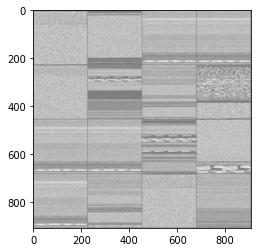

In [ ]:
print(images.shape)
imshow(torchvision.utils.make_grid(images, nrow=4))
print(images.shape)
print((torchvision.utils.make_grid(images)).shape)
print("".join("%5s "%classes[labels[j]] for j in range(16)))

## 03. Define VAE Class
* Initialize
    * (224, 224) input 이미지를 통해 1차원 100개의 latent vector를 생성하는 Encoder네트워크 정의
    * 100개의 latent vector로부터 X_hat을 복원하는 Decoder Network 정의
* encode
* reparameterize
* decode
* forward

In [ ]:
device = torch.device("cuda")  # device = torch.device("cuda")

class VAE(nn.Module):
    def __init__(self):
        super(VAE, self).__init__()

        self.fc1 = nn.Linear(224*224, 1000)
        self.fc21 = nn.Linear(1000, 100)
        self.fc22 = nn.Linear(1000, 100)
        self.fc3 = nn.Linear(100, 1000)
        self.fc4 = nn.Linear(1000, 224*224)

    def encode(self, x):
        h1 = F.relu(self.fc1(x))
        return self.fc21(h1), self.fc22(h1)

    def reparameterize(self, mu, logvar):
        std = torch.exp(0.5*logvar)
        eps = torch.randn_like(std)
        return mu + eps*std

    def decode(self, z):
        h3 = F.relu(self.fc3(z))
        return torch.sigmoid(self.fc4(h3))

    def forward(self, x):
        mu, logvar = self.encode(x.view(-1, 224*224))
        z = self.reparameterize(mu, logvar)  # z's shape => (batch_size, 100)
        return self.decode(z), mu, logvar, z

In [ ]:
model = VAE().to(device)
print(model)

VAE(
  (fc1): Linear(in_features=50176, out_features=1000, bias=True)
  (fc21): Linear(in_features=1000, out_features=100, bias=True)
  (fc22): Linear(in_features=1000, out_features=100, bias=True)
  (fc3): Linear(in_features=100, out_features=1000, bias=True)
  (fc4): Linear(in_features=1000, out_features=50176, bias=True)
)


In [ ]:
optimizer = optim.Adam(model.parameters(), lr=1e-3)

In [ ]:
# track and save train, test loss through Dictionary
# 
Epoch_Loss = {'train_epoch':[],
              'train_loss':[],
              'test_epoch':[],
              'test_loss':[]}

# Save & Loading Model for Inference
# Reference: https://pytorch.org/tutorials/beginner/saving_loading_models.html

# PATH = '/Again_original_Exp01_200-Epoch.pth'

PATH = 'Epochs.pth'
# latent_vector = np.zeros((16, 100))
color_palette = np.zeros((1868))


In [ ]:
# Reconstruction + KL divergence losses summed over all elements and batch
def loss_function(recon_x, x, mu, logvar):
    BCE = F.binary_cross_entropy(recon_x, x.view(-1, 224*224), reduction='mean')  # (input, target, ... reduction)

    # see Appendix B from VAE paper:
    # Kingma and Welling. Auto-Encoding Variational Bayes. ICLR, 2014
    # https://arxiv.org/abs/1312.6114
    # 0.5 * sum(1 + log(sigma^2) - mu^2 - sigma^2)
    KLD = -0.5 * torch.sum(1 + logvar - mu.pow(2) - logvar.exp())

    return BCE + KLD

def train(epoch):
    model.train()
    train_loss = 0
    # latent_vector = np.zeros(())
    # latent_label = 0

    for batch_idx, (data, _) in enumerate(train_loader):
        data = data.to(device)
        optimizer.zero_grad()
        recon_batch, mu, logvar, z= model(data)
    
       
        loss = loss_function(recon_batch, data, mu, logvar)
        loss.backward()
        train_loss += loss.item()
        optimizer.step()
        if batch_idx % 10 == 0:
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                epoch, batch_idx * len(data), len(train_loader.dataset),
                100. * batch_idx / len(train_loader),
                loss.item() / len(data)))

    print('====> Epoch: {} Average loss: {:.4f}'.format(
          epoch, train_loss / len(train_loader.dataset)))
    
    Epoch_Loss['train_epoch'].append(epoch)
    Epoch_Loss['train_loss'].append(train_loss / len(train_loader.dataset))
   
def test(epoch):
    # 10 Epoch 단위로 작업
    # model.state_dict() 저장 및 latent_vector 저장
    # plot latent vector
    if epoch % 10 == 0:  # Epoch이 10의 배수일때

        # save model.state_dict() per 10 Epochs
        torch.save(model.state_dict(), ('./Again_Exp02_' + str(epoch) + PATH))  # Epoch 단위 parameter 저장

        # load_whole test_data 
        for i, (data, _) in enumerate(test_loader_10):  # load_whole test_data
            data = data.to(device)
            recon_batch, mu, logvar, z = model(data)
        # save latent_vector per 10 Epochs
            latent_vector = z.detach().cpu().clone().numpy()  # change tensor type data to cpu().numpy()
                                                              # latent_vector_size: (num_of_data, 100)
            color_palette = _.detach().cpu().clone().numpy()
            with open((str(epoch)+'Epoch_z_vector.npy'), 'wb') as f:
                np.save(f, latent_vector)  # but latent vector size is (16, 100).... just 16...
                                        # 10 Epoch 단위로 latent vector를 저장한다
                                        # 이 떄, latent vector의 size는 test_dataset의 크기가 되어야 한다

        # plot latent vector Every 10 Epochs
        # t-SNE for Dimensionality reduction
        Z_embedded = TSNE(n_components=2).fit_transform(latent_vector)
        
        fig, ax = plt.subplots(1, 1, figsize=(6, 6))  # setup the plot

        x = Z_embedded[:, 0]
        y = Z_embedded[:, 1]
        label = color_palette
        # label[10:12] = 0  # make sure there are some 0 values to show up as grey
        print("=="*20, "params", "=="*20)
        print("Z_embedded.shape:", Z_embedded.shape)
        print("label.shape:", label.shape)
        # tsne_data = np.vstack((Z_embedded, label))
        tsne_data = np.c_[Z_embedded, label]
        tsne_df = pd.DataFrame(data=tsne_data, columns=("Dim_1", "Dim_2", "label"))
        sns.FacetGrid(tsne_df, hue="label", size=6).map(plt.scatter, 'Dim_1', 'Dim_2').add_legend()
        plt.savefig('./' + str(epoch) + '_t_SNE.png', dpi=300)
        plt.show()
        Epoch_Loss['test_epoch'].append(epoch)
        Epoch_Loss['test_loss'].append(test_loss)
    elif epoch % 10 !=0:
        model.eval()
        test_loss = 0
        with torch.no_grad():
            for i, (data, _) in enumerate(test_loader):
                data = data.to(device)
                recon_batch, mu, logvar, z = model(data)
                # z vector는 torch type
                # latent_vector = z.detach().cpu().clone().numpy()
                test_loss += loss_function(recon_batch, data, mu, logvar).item()
                if i == 0:
                    n = min(data.size(0), 8)
                    comparison = torch.cat([data[:n],
                                        recon_batch.view(16, 1, 224, 224)[:n]])
                    save_image(comparison.cpu(),
                            './results_02/reconstruction_' + str(epoch) + '.png', nrow=n)
        test_loss /= len(test_loader.dataset)
        print('====> Test set loss: {:.4f}'.format(test_loss))
        Epoch_Loss['test_epoch'].append(epoch)
        Epoch_Loss['test_loss'].append(test_loss)

*Notice*<br>
After 10 Epoch's retrain it

1
Train Epoch: 1 [0/7471 (0%)]	Loss: 0.970757
Train Epoch: 1 [160/7471 (2%)]	Loss: 2090.940918
Train Epoch: 1 [320/7471 (4%)]	Loss: 1587.501709
Train Epoch: 1 [480/7471 (6%)]	Loss: 1527.569092
Train Epoch: 1 [640/7471 (9%)]	Loss: 1682.449463
Train Epoch: 1 [800/7471 (11%)]	Loss: 1846.232300
Train Epoch: 1 [960/7471 (13%)]	Loss: 1487.957397
Train Epoch: 1 [1120/7471 (15%)]	Loss: 1032.643188
Train Epoch: 1 [1280/7471 (17%)]	Loss: 758.326416
Train Epoch: 1 [1440/7471 (19%)]	Loss: 491.381226
Train Epoch: 1 [1600/7471 (21%)]	Loss: 354.915314
Train Epoch: 1 [1760/7471 (24%)]	Loss: 260.869934
Train Epoch: 1 [1920/7471 (26%)]	Loss: 239.927704
Train Epoch: 1 [2080/7471 (28%)]	Loss: 183.343201
Train Epoch: 1 [2240/7471 (30%)]	Loss: 150.907684
Train Epoch: 1 [2400/7471 (32%)]	Loss: 98.734718
Train Epoch: 1 [2560/7471 (34%)]	Loss: 72.665047
Train Epoch: 1 [2720/7471 (36%)]	Loss: 105.541641
Train Epoch: 1 [2880/7471 (39%)]	Loss: 78.970749
Train Epoch: 1 [3040/7471 (41%)]	Loss: 32.475147
Train Epoch

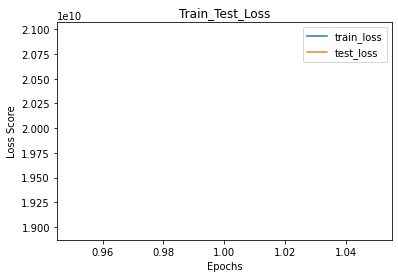

2
Train Epoch: 2 [0/7471 (0%)]	Loss: 71.276550
Train Epoch: 2 [160/7471 (2%)]	Loss: 72.220329
Train Epoch: 2 [320/7471 (4%)]	Loss: 66.422882
Train Epoch: 2 [480/7471 (6%)]	Loss: 72.856163
Train Epoch: 2 [640/7471 (9%)]	Loss: 74.343575
Train Epoch: 2 [800/7471 (11%)]	Loss: 71.399788
Train Epoch: 2 [960/7471 (13%)]	Loss: 72.620872
Train Epoch: 2 [1120/7471 (15%)]	Loss: 75.546768
Train Epoch: 2 [1280/7471 (17%)]	Loss: 70.490250
Train Epoch: 2 [1440/7471 (19%)]	Loss: 71.514603
Train Epoch: 2 [1600/7471 (21%)]	Loss: 72.809509
Train Epoch: 2 [1760/7471 (24%)]	Loss: 69.737061
Train Epoch: 2 [1920/7471 (26%)]	Loss: 80.454376
Train Epoch: 2 [2080/7471 (28%)]	Loss: 78.113068
Train Epoch: 2 [2240/7471 (30%)]	Loss: 75.400230
Train Epoch: 2 [2400/7471 (32%)]	Loss: 78.644554
Train Epoch: 2 [2560/7471 (34%)]	Loss: 69.921295
Train Epoch: 2 [2720/7471 (36%)]	Loss: 74.978905
Train Epoch: 2 [2880/7471 (39%)]	Loss: 68.902359
Train Epoch: 2 [3040/7471 (41%)]	Loss: 85.597206
Train Epoch: 2 [3200/7471 (43%)]

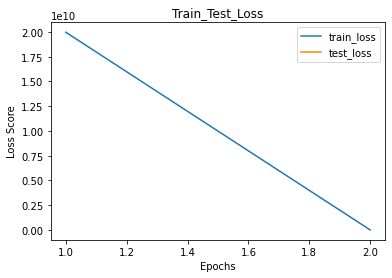

3
Train Epoch: 3 [0/7471 (0%)]	Loss: 187.129913
Train Epoch: 3 [160/7471 (2%)]	Loss: 222.739609
Train Epoch: 3 [320/7471 (4%)]	Loss: 222.194550
Train Epoch: 3 [480/7471 (6%)]	Loss: 240.621460
Train Epoch: 3 [640/7471 (9%)]	Loss: 208.232742
Train Epoch: 3 [800/7471 (11%)]	Loss: 211.769043
Train Epoch: 3 [960/7471 (13%)]	Loss: 182.006760
Train Epoch: 3 [1120/7471 (15%)]	Loss: 165.629684
Train Epoch: 3 [1280/7471 (17%)]	Loss: 139.368301
Train Epoch: 3 [1440/7471 (19%)]	Loss: 162.142120
Train Epoch: 3 [1600/7471 (21%)]	Loss: 206.966537
Train Epoch: 3 [1760/7471 (24%)]	Loss: 240.791107
Train Epoch: 3 [1920/7471 (26%)]	Loss: 487.251099
Train Epoch: 3 [2080/7471 (28%)]	Loss: 481.661743
Train Epoch: 3 [2240/7471 (30%)]	Loss: 528.434814
Train Epoch: 3 [2400/7471 (32%)]	Loss: 669.160583
Train Epoch: 3 [2560/7471 (34%)]	Loss: 1321.174316
Train Epoch: 3 [2720/7471 (36%)]	Loss: 2079.186279
Train Epoch: 3 [2880/7471 (39%)]	Loss: 2738.161621
Train Epoch: 3 [3040/7471 (41%)]	Loss: 4001.799561
Train Ep

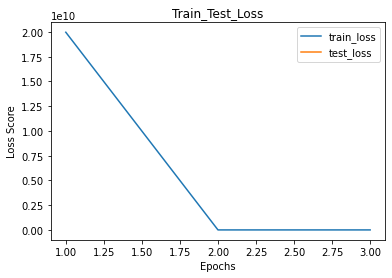

4
Train Epoch: 4 [0/7471 (0%)]	Loss: 2932.332275
Train Epoch: 4 [160/7471 (2%)]	Loss: 2859.337646
Train Epoch: 4 [320/7471 (4%)]	Loss: 2880.805664
Train Epoch: 4 [480/7471 (6%)]	Loss: 3037.419678
Train Epoch: 4 [640/7471 (9%)]	Loss: 2835.228271
Train Epoch: 4 [800/7471 (11%)]	Loss: 2705.644775
Train Epoch: 4 [960/7471 (13%)]	Loss: 2806.817871
Train Epoch: 4 [1120/7471 (15%)]	Loss: 2761.096680
Train Epoch: 4 [1280/7471 (17%)]	Loss: 2474.702637
Train Epoch: 4 [1440/7471 (19%)]	Loss: 2485.173340
Train Epoch: 4 [1600/7471 (21%)]	Loss: 2534.311035
Train Epoch: 4 [1760/7471 (24%)]	Loss: 2362.047363
Train Epoch: 4 [1920/7471 (26%)]	Loss: 2240.321045
Train Epoch: 4 [2080/7471 (28%)]	Loss: 2404.209961
Train Epoch: 4 [2240/7471 (30%)]	Loss: 2438.134766
Train Epoch: 4 [2400/7471 (32%)]	Loss: 2239.354980
Train Epoch: 4 [2560/7471 (34%)]	Loss: 2221.832764
Train Epoch: 4 [2720/7471 (36%)]	Loss: 2121.338867
Train Epoch: 4 [2880/7471 (39%)]	Loss: 2012.208252
Train Epoch: 4 [3040/7471 (41%)]	Loss: 2064

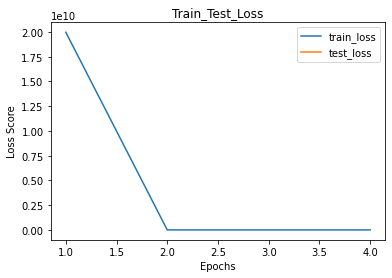

5
Train Epoch: 5 [0/7471 (0%)]	Loss: 1615.485474
Train Epoch: 5 [160/7471 (2%)]	Loss: 1548.673828
Train Epoch: 5 [320/7471 (4%)]	Loss: 1546.772461
Train Epoch: 5 [480/7471 (6%)]	Loss: 1582.243286
Train Epoch: 5 [640/7471 (9%)]	Loss: 1543.396973
Train Epoch: 5 [800/7471 (11%)]	Loss: 1586.892456
Train Epoch: 5 [960/7471 (13%)]	Loss: 1513.494873
Train Epoch: 5 [1120/7471 (15%)]	Loss: 1531.626099
Train Epoch: 5 [1280/7471 (17%)]	Loss: 1541.744263
Train Epoch: 5 [1440/7471 (19%)]	Loss: 1480.763184
Train Epoch: 5 [1600/7471 (21%)]	Loss: 1450.713501
Train Epoch: 5 [1760/7471 (24%)]	Loss: 1403.286377
Train Epoch: 5 [1920/7471 (26%)]	Loss: 1487.584351
Train Epoch: 5 [2080/7471 (28%)]	Loss: 1413.136475
Train Epoch: 5 [2240/7471 (30%)]	Loss: 1444.625122
Train Epoch: 5 [2400/7471 (32%)]	Loss: 1590.620483
Train Epoch: 5 [2560/7471 (34%)]	Loss: 1491.299194
Train Epoch: 5 [2720/7471 (36%)]	Loss: 1395.130493
Train Epoch: 5 [2880/7471 (39%)]	Loss: 1303.693970
Train Epoch: 5 [3040/7471 (41%)]	Loss: 1325

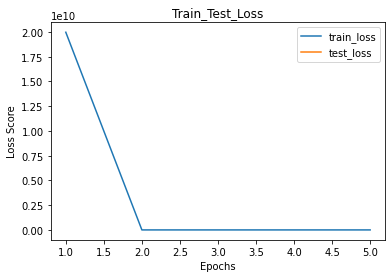

6
Train Epoch: 6 [0/7471 (0%)]	Loss: 1281.573853
Train Epoch: 6 [160/7471 (2%)]	Loss: 1154.523682
Train Epoch: 6 [320/7471 (4%)]	Loss: 1230.803345
Train Epoch: 6 [480/7471 (6%)]	Loss: 1172.286011
Train Epoch: 6 [640/7471 (9%)]	Loss: 1111.220581
Train Epoch: 6 [800/7471 (11%)]	Loss: 1146.319946
Train Epoch: 6 [960/7471 (13%)]	Loss: 1062.864136
Train Epoch: 6 [1120/7471 (15%)]	Loss: 1129.328003
Train Epoch: 6 [1280/7471 (17%)]	Loss: 1022.248596
Train Epoch: 6 [1440/7471 (19%)]	Loss: 1069.859985
Train Epoch: 6 [1600/7471 (21%)]	Loss: 1026.903564
Train Epoch: 6 [1760/7471 (24%)]	Loss: 948.024902
Train Epoch: 6 [1920/7471 (26%)]	Loss: 938.315552
Train Epoch: 6 [2080/7471 (28%)]	Loss: 984.393250
Train Epoch: 6 [2240/7471 (30%)]	Loss: 1074.892456
Train Epoch: 6 [2400/7471 (32%)]	Loss: 1011.066345
Train Epoch: 6 [2560/7471 (34%)]	Loss: 1011.715820
Train Epoch: 6 [2720/7471 (36%)]	Loss: 973.031860
Train Epoch: 6 [2880/7471 (39%)]	Loss: 1077.918335
Train Epoch: 6 [3040/7471 (41%)]	Loss: 1031.465

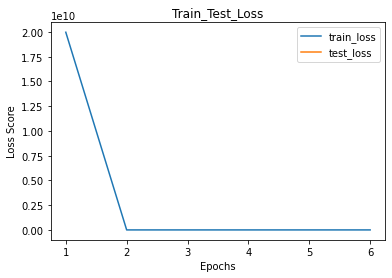

7
Train Epoch: 7 [0/7471 (0%)]	Loss: 945.314148
Train Epoch: 7 [160/7471 (2%)]	Loss: 892.499390
Train Epoch: 7 [320/7471 (4%)]	Loss: 899.020630
Train Epoch: 7 [480/7471 (6%)]	Loss: 937.526672
Train Epoch: 7 [640/7471 (9%)]	Loss: 900.405945
Train Epoch: 7 [800/7471 (11%)]	Loss: 918.250916
Train Epoch: 7 [960/7471 (13%)]	Loss: 912.099670
Train Epoch: 7 [1120/7471 (15%)]	Loss: 889.284851
Train Epoch: 7 [1280/7471 (17%)]	Loss: 936.106506
Train Epoch: 7 [1440/7471 (19%)]	Loss: 859.080322
Train Epoch: 7 [1600/7471 (21%)]	Loss: 884.799988
Train Epoch: 7 [1760/7471 (24%)]	Loss: 842.622864
Train Epoch: 7 [1920/7471 (26%)]	Loss: 869.567871
Train Epoch: 7 [2080/7471 (28%)]	Loss: 862.998169
Train Epoch: 7 [2240/7471 (30%)]	Loss: 861.970093
Train Epoch: 7 [2400/7471 (32%)]	Loss: 847.395264
Train Epoch: 7 [2560/7471 (34%)]	Loss: 805.822632
Train Epoch: 7 [2720/7471 (36%)]	Loss: 832.298767
Train Epoch: 7 [2880/7471 (39%)]	Loss: 825.568176
Train Epoch: 7 [3040/7471 (41%)]	Loss: 869.373169
Train Epoch:

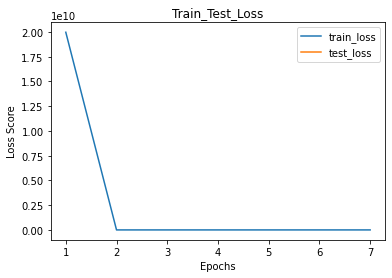

8
Train Epoch: 8 [0/7471 (0%)]	Loss: 2574.714600
Train Epoch: 8 [160/7471 (2%)]	Loss: 2571.027100
Train Epoch: 8 [320/7471 (4%)]	Loss: 2367.619873
Train Epoch: 8 [480/7471 (6%)]	Loss: 2256.525391
Train Epoch: 8 [640/7471 (9%)]	Loss: 2346.095215
Train Epoch: 8 [800/7471 (11%)]	Loss: 2235.114258
Train Epoch: 8 [960/7471 (13%)]	Loss: 2296.468994
Train Epoch: 8 [1120/7471 (15%)]	Loss: 2212.677734
Train Epoch: 8 [1280/7471 (17%)]	Loss: 1998.953979
Train Epoch: 8 [1440/7471 (19%)]	Loss: 2021.857544
Train Epoch: 8 [1600/7471 (21%)]	Loss: 2007.090576
Train Epoch: 8 [1760/7471 (24%)]	Loss: 2152.482178
Train Epoch: 8 [1920/7471 (26%)]	Loss: 1955.225586
Train Epoch: 8 [2080/7471 (28%)]	Loss: 2074.313477
Train Epoch: 8 [2240/7471 (30%)]	Loss: 2084.452148
Train Epoch: 8 [2400/7471 (32%)]	Loss: 1908.343384
Train Epoch: 8 [2560/7471 (34%)]	Loss: 1819.914307
Train Epoch: 8 [2720/7471 (36%)]	Loss: 1781.432007
Train Epoch: 8 [2880/7471 (39%)]	Loss: 1784.852295
Train Epoch: 8 [3040/7471 (41%)]	Loss: 1721

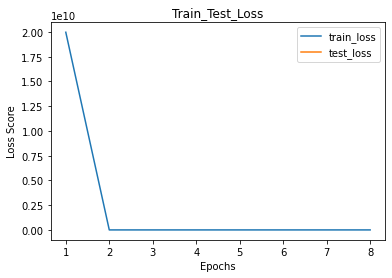

9
Train Epoch: 9 [0/7471 (0%)]	Loss: 1219.444580
Train Epoch: 9 [160/7471 (2%)]	Loss: 1238.757080
Train Epoch: 9 [320/7471 (4%)]	Loss: 1232.178101
Train Epoch: 9 [480/7471 (6%)]	Loss: 1144.709595
Train Epoch: 9 [640/7471 (9%)]	Loss: 1228.224121
Train Epoch: 9 [800/7471 (11%)]	Loss: 1157.737671
Train Epoch: 9 [960/7471 (13%)]	Loss: 1208.455566
Train Epoch: 9 [1120/7471 (15%)]	Loss: 1162.441772
Train Epoch: 9 [1280/7471 (17%)]	Loss: 1117.235596
Train Epoch: 9 [1440/7471 (19%)]	Loss: 1119.763428
Train Epoch: 9 [1600/7471 (21%)]	Loss: 1137.874878
Train Epoch: 9 [1760/7471 (24%)]	Loss: 1031.645020
Train Epoch: 9 [1920/7471 (26%)]	Loss: 1095.213501
Train Epoch: 9 [2080/7471 (28%)]	Loss: 1109.760254
Train Epoch: 9 [2240/7471 (30%)]	Loss: 1113.860962
Train Epoch: 9 [2400/7471 (32%)]	Loss: 1073.052612
Train Epoch: 9 [2560/7471 (34%)]	Loss: 1054.282959
Train Epoch: 9 [2720/7471 (36%)]	Loss: 1087.299072
Train Epoch: 9 [2880/7471 (39%)]	Loss: 1039.829102
Train Epoch: 9 [3040/7471 (41%)]	Loss: 1066

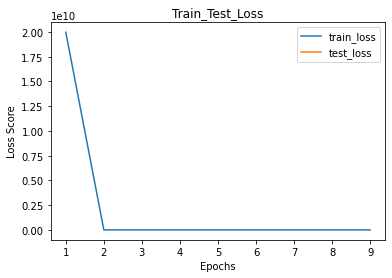

10
Train Epoch: 10 [0/7471 (0%)]	Loss: 1001.843933
Train Epoch: 10 [160/7471 (2%)]	Loss: 1132.716431
Train Epoch: 10 [320/7471 (4%)]	Loss: 1023.432678
Train Epoch: 10 [480/7471 (6%)]	Loss: 1027.366455
Train Epoch: 10 [640/7471 (9%)]	Loss: 991.986389
Train Epoch: 10 [800/7471 (11%)]	Loss: 1037.393188
Train Epoch: 10 [960/7471 (13%)]	Loss: 974.267517
Train Epoch: 10 [1120/7471 (15%)]	Loss: 1016.123840
Train Epoch: 10 [1280/7471 (17%)]	Loss: 945.887268
Train Epoch: 10 [1440/7471 (19%)]	Loss: 923.833435
Train Epoch: 10 [1600/7471 (21%)]	Loss: 1010.630859
Train Epoch: 10 [1760/7471 (24%)]	Loss: 937.810608
Train Epoch: 10 [1920/7471 (26%)]	Loss: 1053.293701
Train Epoch: 10 [2080/7471 (28%)]	Loss: 994.075684
Train Epoch: 10 [2240/7471 (30%)]	Loss: 945.286133
Train Epoch: 10 [2400/7471 (32%)]	Loss: 980.222290
Train Epoch: 10 [2560/7471 (34%)]	Loss: 997.698120
Train Epoch: 10 [2720/7471 (36%)]	Loss: 888.322388
Train Epoch: 10 [2880/7471 (39%)]	Loss: 938.869141
Train Epoch: 10 [3040/7471 (41%)]	

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


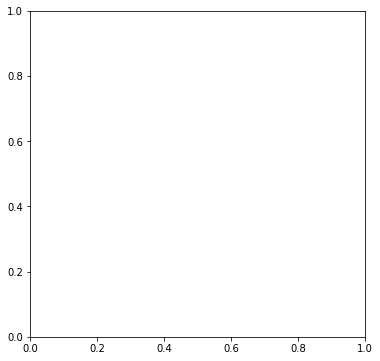

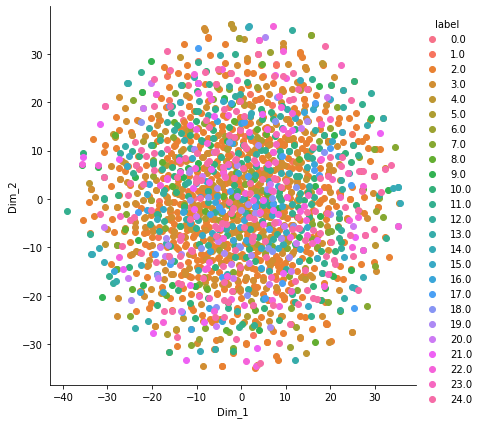

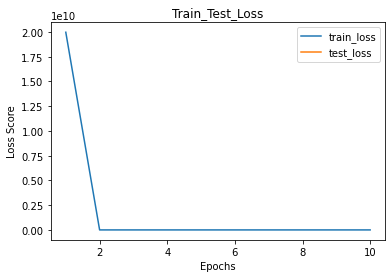

11
Train Epoch: 11 [0/7471 (0%)]	Loss: 1256.630615
Train Epoch: 11 [160/7471 (2%)]	Loss: 1127.145020
Train Epoch: 11 [320/7471 (4%)]	Loss: 1105.104736
Train Epoch: 11 [480/7471 (6%)]	Loss: 1108.708374
Train Epoch: 11 [640/7471 (9%)]	Loss: 954.089233
Train Epoch: 11 [800/7471 (11%)]	Loss: 1004.028687
Train Epoch: 11 [960/7471 (13%)]	Loss: 981.941711
Train Epoch: 11 [1120/7471 (15%)]	Loss: 1120.028198
Train Epoch: 11 [1280/7471 (17%)]	Loss: 1095.974121
Train Epoch: 11 [1440/7471 (19%)]	Loss: 1100.315186
Train Epoch: 11 [1600/7471 (21%)]	Loss: 1152.188599
Train Epoch: 11 [1760/7471 (24%)]	Loss: 1147.674561
Train Epoch: 11 [1920/7471 (26%)]	Loss: 1212.045288
Train Epoch: 11 [2080/7471 (28%)]	Loss: 1189.444580
Train Epoch: 11 [2240/7471 (30%)]	Loss: 1188.087280
Train Epoch: 11 [2400/7471 (32%)]	Loss: 1171.289551
Train Epoch: 11 [2560/7471 (34%)]	Loss: 1127.954590
Train Epoch: 11 [2720/7471 (36%)]	Loss: 1149.901978
Train Epoch: 11 [2880/7471 (39%)]	Loss: 1069.992065
Train Epoch: 11 [3040/747

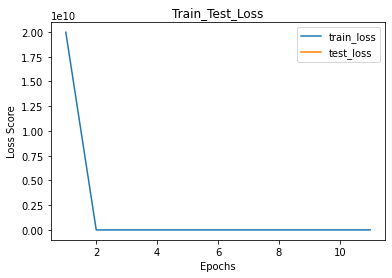

12
Train Epoch: 12 [0/7471 (0%)]	Loss: 1651.917969
Train Epoch: 12 [160/7471 (2%)]	Loss: 1507.810303
Train Epoch: 12 [320/7471 (4%)]	Loss: 1389.586060
Train Epoch: 12 [480/7471 (6%)]	Loss: 1527.547974
Train Epoch: 12 [640/7471 (9%)]	Loss: 1523.916138
Train Epoch: 12 [800/7471 (11%)]	Loss: 1603.850098
Train Epoch: 12 [960/7471 (13%)]	Loss: 1683.115601
Train Epoch: 12 [1120/7471 (15%)]	Loss: 1504.342041
Train Epoch: 12 [1280/7471 (17%)]	Loss: 1612.288330
Train Epoch: 12 [1440/7471 (19%)]	Loss: 1539.907715
Train Epoch: 12 [1600/7471 (21%)]	Loss: 1522.558838
Train Epoch: 12 [1760/7471 (24%)]	Loss: 1569.269897
Train Epoch: 12 [1920/7471 (26%)]	Loss: 1526.462280
Train Epoch: 12 [2080/7471 (28%)]	Loss: 1572.159058
Train Epoch: 12 [2240/7471 (30%)]	Loss: 1592.402100
Train Epoch: 12 [2400/7471 (32%)]	Loss: 1711.508667
Train Epoch: 12 [2560/7471 (34%)]	Loss: 1709.957397
Train Epoch: 12 [2720/7471 (36%)]	Loss: 1718.398926
Train Epoch: 12 [2880/7471 (39%)]	Loss: 1703.651001
Train Epoch: 12 [3040/7

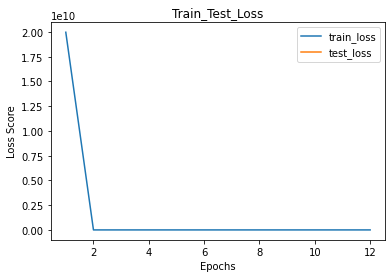

13
Train Epoch: 13 [0/7471 (0%)]	Loss: 2185.302979
Train Epoch: 13 [160/7471 (2%)]	Loss: 2081.475586
Train Epoch: 13 [320/7471 (4%)]	Loss: 2199.204590
Train Epoch: 13 [480/7471 (6%)]	Loss: 2392.501709
Train Epoch: 13 [640/7471 (9%)]	Loss: 2262.146729
Train Epoch: 13 [800/7471 (11%)]	Loss: 2195.826172
Train Epoch: 13 [960/7471 (13%)]	Loss: 2336.647705
Train Epoch: 13 [1120/7471 (15%)]	Loss: 2440.653076
Train Epoch: 13 [1280/7471 (17%)]	Loss: 2499.733643
Train Epoch: 13 [1440/7471 (19%)]	Loss: 2618.075439
Train Epoch: 13 [1600/7471 (21%)]	Loss: 2454.649902
Train Epoch: 13 [1760/7471 (24%)]	Loss: 2359.173584
Train Epoch: 13 [1920/7471 (26%)]	Loss: 2662.847168
Train Epoch: 13 [2080/7471 (28%)]	Loss: 2436.024902
Train Epoch: 13 [2240/7471 (30%)]	Loss: 2521.052490
Train Epoch: 13 [2400/7471 (32%)]	Loss: 2534.742432
Train Epoch: 13 [2560/7471 (34%)]	Loss: 2633.810547
Train Epoch: 13 [2720/7471 (36%)]	Loss: 2382.987793
Train Epoch: 13 [2880/7471 (39%)]	Loss: 2659.591309
Train Epoch: 13 [3040/7

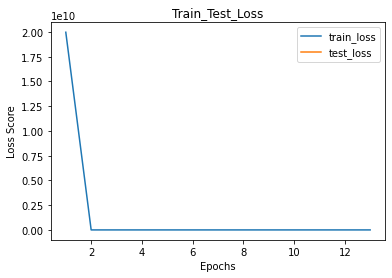

14
Train Epoch: 14 [0/7471 (0%)]	Loss: 2354.423584
Train Epoch: 14 [160/7471 (2%)]	Loss: 2505.954346
Train Epoch: 14 [320/7471 (4%)]	Loss: 2507.480469
Train Epoch: 14 [480/7471 (6%)]	Loss: 2526.050049
Train Epoch: 14 [640/7471 (9%)]	Loss: 2487.970459
Train Epoch: 14 [800/7471 (11%)]	Loss: 2348.398926
Train Epoch: 14 [960/7471 (13%)]	Loss: 2589.360596
Train Epoch: 14 [1120/7471 (15%)]	Loss: 2451.161133
Train Epoch: 14 [1280/7471 (17%)]	Loss: 2288.412354
Train Epoch: 14 [1440/7471 (19%)]	Loss: 2430.585693
Train Epoch: 14 [1600/7471 (21%)]	Loss: 2318.250732
Train Epoch: 14 [1760/7471 (24%)]	Loss: 2618.216064
Train Epoch: 14 [1920/7471 (26%)]	Loss: 2348.459717
Train Epoch: 14 [2080/7471 (28%)]	Loss: 2363.904053
Train Epoch: 14 [2240/7471 (30%)]	Loss: 2353.853027
Train Epoch: 14 [2400/7471 (32%)]	Loss: 2333.532227
Train Epoch: 14 [2560/7471 (34%)]	Loss: 2363.162842
Train Epoch: 14 [2720/7471 (36%)]	Loss: 2520.929199
Train Epoch: 14 [2880/7471 (39%)]	Loss: 2334.965088
Train Epoch: 14 [3040/7

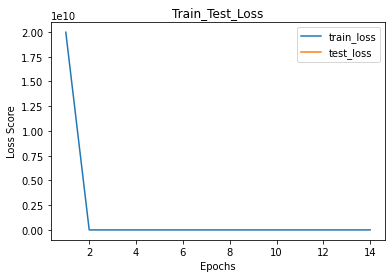

15
Train Epoch: 15 [0/7471 (0%)]	Loss: 2273.333984
Train Epoch: 15 [160/7471 (2%)]	Loss: 2423.411621
Train Epoch: 15 [320/7471 (4%)]	Loss: 2221.573242
Train Epoch: 15 [480/7471 (6%)]	Loss: 2502.208008
Train Epoch: 15 [640/7471 (9%)]	Loss: 2404.426514
Train Epoch: 15 [800/7471 (11%)]	Loss: 2464.856689
Train Epoch: 15 [960/7471 (13%)]	Loss: 2301.427002
Train Epoch: 15 [1120/7471 (15%)]	Loss: 2292.204102
Train Epoch: 15 [1280/7471 (17%)]	Loss: 2378.305664
Train Epoch: 15 [1440/7471 (19%)]	Loss: 2192.028076
Train Epoch: 15 [1600/7471 (21%)]	Loss: 2559.084229
Train Epoch: 15 [1760/7471 (24%)]	Loss: 3074.727051
Train Epoch: 15 [1920/7471 (26%)]	Loss: 4037.389648
Train Epoch: 15 [2080/7471 (28%)]	Loss: 4741.337891
Train Epoch: 15 [2240/7471 (30%)]	Loss: 5025.630371
Train Epoch: 15 [2400/7471 (32%)]	Loss: 5703.869629
Train Epoch: 15 [2560/7471 (34%)]	Loss: 5892.880371
Train Epoch: 15 [2720/7471 (36%)]	Loss: 5664.515625
Train Epoch: 15 [2880/7471 (39%)]	Loss: 6291.755859
Train Epoch: 15 [3040/7

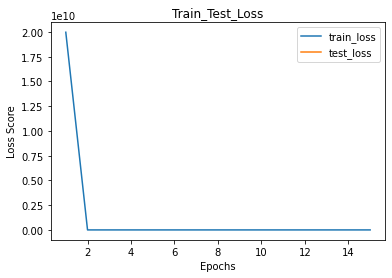

16
Train Epoch: 16 [0/7471 (0%)]	Loss: 4706.729492
Train Epoch: 16 [160/7471 (2%)]	Loss: 5483.970215
Train Epoch: 16 [320/7471 (4%)]	Loss: 5425.350586
Train Epoch: 16 [480/7471 (6%)]	Loss: 5908.102051
Train Epoch: 16 [640/7471 (9%)]	Loss: 4861.480469
Train Epoch: 16 [800/7471 (11%)]	Loss: 5602.875488
Train Epoch: 16 [960/7471 (13%)]	Loss: 5419.377930
Train Epoch: 16 [1120/7471 (15%)]	Loss: 5087.587891
Train Epoch: 16 [1280/7471 (17%)]	Loss: 5392.789551
Train Epoch: 16 [1440/7471 (19%)]	Loss: 5735.843750
Train Epoch: 16 [1600/7471 (21%)]	Loss: 5553.230957
Train Epoch: 16 [1760/7471 (24%)]	Loss: 5152.411621
Train Epoch: 16 [1920/7471 (26%)]	Loss: 5117.924805
Train Epoch: 16 [2080/7471 (28%)]	Loss: 5353.620605
Train Epoch: 16 [2240/7471 (30%)]	Loss: 5464.570801
Train Epoch: 16 [2400/7471 (32%)]	Loss: 4762.888672
Train Epoch: 16 [2560/7471 (34%)]	Loss: 5254.360840
Train Epoch: 16 [2720/7471 (36%)]	Loss: 4990.970215
Train Epoch: 16 [2880/7471 (39%)]	Loss: 5260.680176
Train Epoch: 16 [3040/7

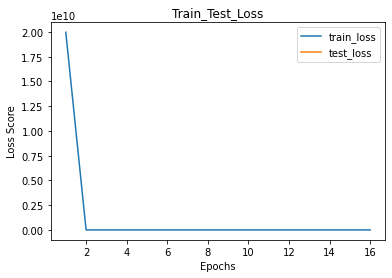

17
Train Epoch: 17 [0/7471 (0%)]	Loss: 3449.614502
Train Epoch: 17 [160/7471 (2%)]	Loss: 3664.244873
Train Epoch: 17 [320/7471 (4%)]	Loss: 3511.312988
Train Epoch: 17 [480/7471 (6%)]	Loss: 3767.421387
Train Epoch: 17 [640/7471 (9%)]	Loss: 3659.042236
Train Epoch: 17 [800/7471 (11%)]	Loss: 3433.684570
Train Epoch: 17 [960/7471 (13%)]	Loss: 3466.366455
Train Epoch: 17 [1120/7471 (15%)]	Loss: 3306.736572
Train Epoch: 17 [1280/7471 (17%)]	Loss: 3141.195068
Train Epoch: 17 [1440/7471 (19%)]	Loss: 3497.373047
Train Epoch: 17 [1600/7471 (21%)]	Loss: 3205.298096
Train Epoch: 17 [1760/7471 (24%)]	Loss: 3402.072266
Train Epoch: 17 [1920/7471 (26%)]	Loss: 3121.344482
Train Epoch: 17 [2080/7471 (28%)]	Loss: 2956.662842
Train Epoch: 17 [2240/7471 (30%)]	Loss: 3040.102051
Train Epoch: 17 [2400/7471 (32%)]	Loss: 2908.822510
Train Epoch: 17 [2560/7471 (34%)]	Loss: 2965.832764
Train Epoch: 17 [2720/7471 (36%)]	Loss: 3005.166992
Train Epoch: 17 [2880/7471 (39%)]	Loss: 3020.150879
Train Epoch: 17 [3040/7

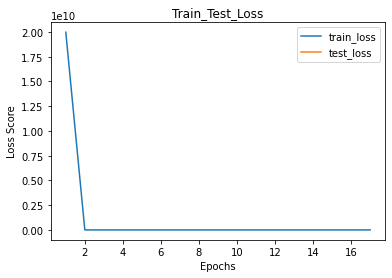

18
Train Epoch: 18 [0/7471 (0%)]	Loss: 2778.069824
Train Epoch: 18 [160/7471 (2%)]	Loss: 2672.802490
Train Epoch: 18 [320/7471 (4%)]	Loss: 2585.850098
Train Epoch: 18 [480/7471 (6%)]	Loss: 2712.315918
Train Epoch: 18 [640/7471 (9%)]	Loss: 2663.337891
Train Epoch: 18 [800/7471 (11%)]	Loss: 2645.940674
Train Epoch: 18 [960/7471 (13%)]	Loss: 2532.956055
Train Epoch: 18 [1120/7471 (15%)]	Loss: 2511.163330
Train Epoch: 18 [1280/7471 (17%)]	Loss: 2682.836670
Train Epoch: 18 [1440/7471 (19%)]	Loss: 2755.010742
Train Epoch: 18 [1600/7471 (21%)]	Loss: 2275.681152
Train Epoch: 18 [1760/7471 (24%)]	Loss: 2622.476562
Train Epoch: 18 [1920/7471 (26%)]	Loss: 2547.123535
Train Epoch: 18 [2080/7471 (28%)]	Loss: 2581.603516
Train Epoch: 18 [2240/7471 (30%)]	Loss: 2633.403320
Train Epoch: 18 [2400/7471 (32%)]	Loss: 2336.104980
Train Epoch: 18 [2560/7471 (34%)]	Loss: 2379.420410
Train Epoch: 18 [2720/7471 (36%)]	Loss: 2489.733887
Train Epoch: 18 [2880/7471 (39%)]	Loss: 2710.002441
Train Epoch: 18 [3040/7

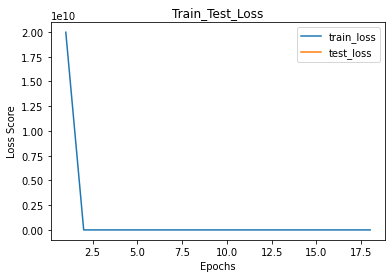

19
Train Epoch: 19 [0/7471 (0%)]	Loss: 2469.981201
Train Epoch: 19 [160/7471 (2%)]	Loss: 2411.495117
Train Epoch: 19 [320/7471 (4%)]	Loss: 2423.618164
Train Epoch: 19 [480/7471 (6%)]	Loss: 2353.742676
Train Epoch: 19 [640/7471 (9%)]	Loss: 2288.715820
Train Epoch: 19 [800/7471 (11%)]	Loss: 2343.356689
Train Epoch: 19 [960/7471 (13%)]	Loss: 2433.728027
Train Epoch: 19 [1120/7471 (15%)]	Loss: 2167.104980
Train Epoch: 19 [1280/7471 (17%)]	Loss: 2175.041016
Train Epoch: 19 [1440/7471 (19%)]	Loss: 2304.337158
Train Epoch: 19 [1600/7471 (21%)]	Loss: 2374.114502
Train Epoch: 19 [1760/7471 (24%)]	Loss: 2316.809570
Train Epoch: 19 [1920/7471 (26%)]	Loss: 2169.717285
Train Epoch: 19 [2080/7471 (28%)]	Loss: 2117.486328
Train Epoch: 19 [2240/7471 (30%)]	Loss: 2255.973633
Train Epoch: 19 [2400/7471 (32%)]	Loss: 2158.897217
Train Epoch: 19 [2560/7471 (34%)]	Loss: 2014.078613
Train Epoch: 19 [2720/7471 (36%)]	Loss: 2160.479736
Train Epoch: 19 [2880/7471 (39%)]	Loss: 2100.008057
Train Epoch: 19 [3040/7

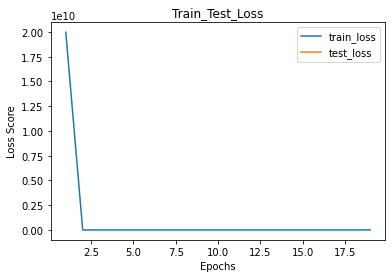

20
Train Epoch: 20 [0/7471 (0%)]	Loss: 1884.141235
Train Epoch: 20 [160/7471 (2%)]	Loss: 1848.850342
Train Epoch: 20 [320/7471 (4%)]	Loss: 1874.390015
Train Epoch: 20 [480/7471 (6%)]	Loss: 1996.235840
Train Epoch: 20 [640/7471 (9%)]	Loss: 1861.505493
Train Epoch: 20 [800/7471 (11%)]	Loss: 1849.941650
Train Epoch: 20 [960/7471 (13%)]	Loss: 1906.184937
Train Epoch: 20 [1120/7471 (15%)]	Loss: 1957.146362
Train Epoch: 20 [1280/7471 (17%)]	Loss: 1889.505981
Train Epoch: 20 [1440/7471 (19%)]	Loss: 1940.248413
Train Epoch: 20 [1600/7471 (21%)]	Loss: 1873.471924
Train Epoch: 20 [1760/7471 (24%)]	Loss: 1887.000366
Train Epoch: 20 [1920/7471 (26%)]	Loss: 1783.983154
Train Epoch: 20 [2080/7471 (28%)]	Loss: 1865.660400
Train Epoch: 20 [2240/7471 (30%)]	Loss: 1826.994995
Train Epoch: 20 [2400/7471 (32%)]	Loss: 1793.723145
Train Epoch: 20 [2560/7471 (34%)]	Loss: 1917.717407
Train Epoch: 20 [2720/7471 (36%)]	Loss: 1802.105835
Train Epoch: 20 [2880/7471 (39%)]	Loss: 1813.325195
Train Epoch: 20 [3040/7

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


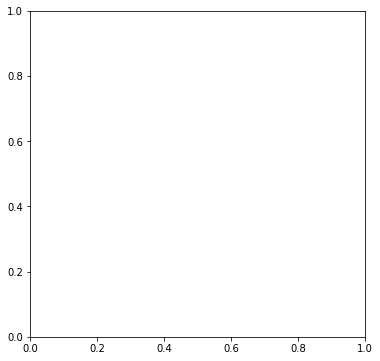

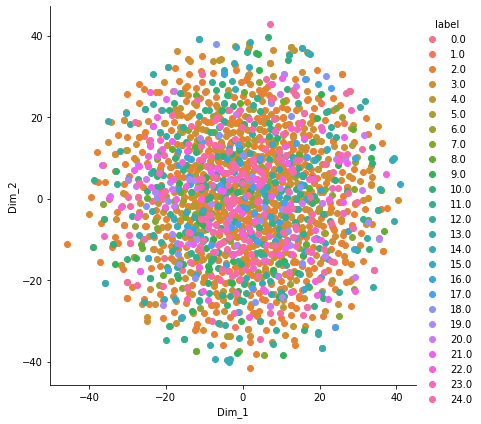

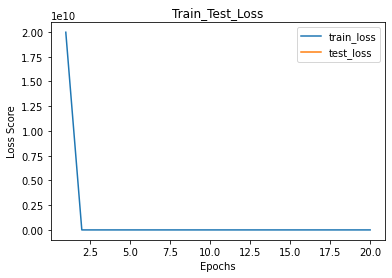

21
Train Epoch: 21 [0/7471 (0%)]	Loss: 1711.138794
Train Epoch: 21 [160/7471 (2%)]	Loss: 1648.713257
Train Epoch: 21 [320/7471 (4%)]	Loss: 1663.135742
Train Epoch: 21 [480/7471 (6%)]	Loss: 1626.926636
Train Epoch: 21 [640/7471 (9%)]	Loss: 1660.788818
Train Epoch: 21 [800/7471 (11%)]	Loss: 1679.852905
Train Epoch: 21 [960/7471 (13%)]	Loss: 1720.628662
Train Epoch: 21 [1120/7471 (15%)]	Loss: 1700.435425
Train Epoch: 21 [1280/7471 (17%)]	Loss: 1680.417358
Train Epoch: 21 [1440/7471 (19%)]	Loss: 1670.075806
Train Epoch: 21 [1600/7471 (21%)]	Loss: 1703.034302
Train Epoch: 21 [1760/7471 (24%)]	Loss: 1497.176758
Train Epoch: 21 [1920/7471 (26%)]	Loss: 1652.178101
Train Epoch: 21 [2080/7471 (28%)]	Loss: 1657.568604
Train Epoch: 21 [2240/7471 (30%)]	Loss: 1629.861572
Train Epoch: 21 [2400/7471 (32%)]	Loss: 1674.285889
Train Epoch: 21 [2560/7471 (34%)]	Loss: 1671.742676
Train Epoch: 21 [2720/7471 (36%)]	Loss: 1624.810913
Train Epoch: 21 [2880/7471 (39%)]	Loss: 1795.743286
Train Epoch: 21 [3040/7

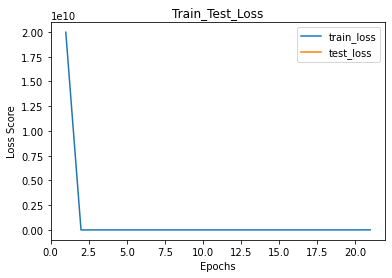

22
Train Epoch: 22 [0/7471 (0%)]	Loss: 8393.898438
Train Epoch: 22 [160/7471 (2%)]	Loss: 8311.852539
Train Epoch: 22 [320/7471 (4%)]	Loss: 8201.675781
Train Epoch: 22 [480/7471 (6%)]	Loss: 8422.546875
Train Epoch: 22 [640/7471 (9%)]	Loss: 8253.384766
Train Epoch: 22 [800/7471 (11%)]	Loss: 8004.072754
Train Epoch: 22 [960/7471 (13%)]	Loss: 7504.345703
Train Epoch: 22 [1120/7471 (15%)]	Loss: 7650.510254
Train Epoch: 22 [1280/7471 (17%)]	Loss: 7605.441406
Train Epoch: 22 [1440/7471 (19%)]	Loss: 7469.555176
Train Epoch: 22 [1600/7471 (21%)]	Loss: 7527.129883
Train Epoch: 22 [1760/7471 (24%)]	Loss: 6821.541504
Train Epoch: 22 [1920/7471 (26%)]	Loss: 7140.343750
Train Epoch: 22 [2080/7471 (28%)]	Loss: 6715.148926
Train Epoch: 22 [2240/7471 (30%)]	Loss: 7020.582031
Train Epoch: 22 [2400/7471 (32%)]	Loss: 6968.802246
Train Epoch: 22 [2560/7471 (34%)]	Loss: 7124.326172
Train Epoch: 22 [2720/7471 (36%)]	Loss: 6729.623535
Train Epoch: 22 [2880/7471 (39%)]	Loss: 6165.752930
Train Epoch: 22 [3040/7

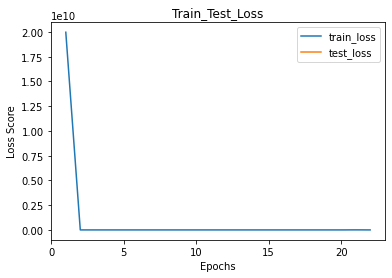

23
Train Epoch: 23 [0/7471 (0%)]	Loss: 5645.022949
Train Epoch: 23 [160/7471 (2%)]	Loss: 5329.626465
Train Epoch: 23 [320/7471 (4%)]	Loss: 5495.833008
Train Epoch: 23 [480/7471 (6%)]	Loss: 5793.497559
Train Epoch: 23 [640/7471 (9%)]	Loss: 5286.694824
Train Epoch: 23 [800/7471 (11%)]	Loss: 5631.617676
Train Epoch: 23 [960/7471 (13%)]	Loss: 5463.756836
Train Epoch: 23 [1120/7471 (15%)]	Loss: 5264.050293
Train Epoch: 23 [1280/7471 (17%)]	Loss: 4980.441895
Train Epoch: 23 [1440/7471 (19%)]	Loss: 5480.994141
Train Epoch: 23 [1600/7471 (21%)]	Loss: 5041.909180
Train Epoch: 23 [1760/7471 (24%)]	Loss: 5085.978516
Train Epoch: 23 [1920/7471 (26%)]	Loss: 4863.003906
Train Epoch: 23 [2080/7471 (28%)]	Loss: 5082.994629
Train Epoch: 23 [2240/7471 (30%)]	Loss: 5235.803223
Train Epoch: 23 [2400/7471 (32%)]	Loss: 5305.412598
Train Epoch: 23 [2560/7471 (34%)]	Loss: 5395.848633
Train Epoch: 23 [2720/7471 (36%)]	Loss: 5155.228516
Train Epoch: 23 [2880/7471 (39%)]	Loss: 5086.629395
Train Epoch: 23 [3040/7

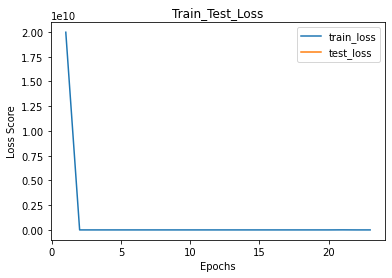

24
Train Epoch: 24 [0/7471 (0%)]	Loss: 4534.765625
Train Epoch: 24 [160/7471 (2%)]	Loss: 5048.875000
Train Epoch: 24 [320/7471 (4%)]	Loss: 4901.336426
Train Epoch: 24 [480/7471 (6%)]	Loss: 4718.092285
Train Epoch: 24 [640/7471 (9%)]	Loss: 4858.756348
Train Epoch: 24 [800/7471 (11%)]	Loss: 4944.605957
Train Epoch: 24 [960/7471 (13%)]	Loss: 4783.366699
Train Epoch: 24 [1120/7471 (15%)]	Loss: 4579.195801
Train Epoch: 24 [1280/7471 (17%)]	Loss: 4844.391602
Train Epoch: 24 [1440/7471 (19%)]	Loss: 4891.232910
Train Epoch: 24 [1600/7471 (21%)]	Loss: 4901.984375
Train Epoch: 24 [1760/7471 (24%)]	Loss: 4761.625977
Train Epoch: 24 [1920/7471 (26%)]	Loss: 4791.646973
Train Epoch: 24 [2080/7471 (28%)]	Loss: 5021.967773
Train Epoch: 24 [2240/7471 (30%)]	Loss: 4926.762207
Train Epoch: 24 [2400/7471 (32%)]	Loss: 4615.939941
Train Epoch: 24 [2560/7471 (34%)]	Loss: 4527.091309
Train Epoch: 24 [2720/7471 (36%)]	Loss: 4373.203125
Train Epoch: 24 [2880/7471 (39%)]	Loss: 4701.510254
Train Epoch: 24 [3040/7

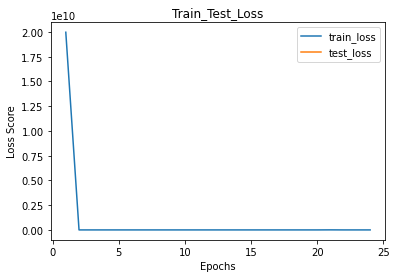

25
Train Epoch: 25 [0/7471 (0%)]	Loss: 4284.590332
Train Epoch: 25 [160/7471 (2%)]	Loss: 4357.457520
Train Epoch: 25 [320/7471 (4%)]	Loss: 4172.864258
Train Epoch: 25 [480/7471 (6%)]	Loss: 3783.800537
Train Epoch: 25 [640/7471 (9%)]	Loss: 4103.338379
Train Epoch: 25 [800/7471 (11%)]	Loss: 4041.466064
Train Epoch: 25 [960/7471 (13%)]	Loss: 4073.590576
Train Epoch: 25 [1120/7471 (15%)]	Loss: 4310.220703
Train Epoch: 25 [1280/7471 (17%)]	Loss: 4232.167969
Train Epoch: 25 [1440/7471 (19%)]	Loss: 4241.998535
Train Epoch: 25 [1600/7471 (21%)]	Loss: 3929.924805
Train Epoch: 25 [1760/7471 (24%)]	Loss: 4134.824219
Train Epoch: 25 [1920/7471 (26%)]	Loss: 4130.673340
Train Epoch: 25 [2080/7471 (28%)]	Loss: 3960.568848
Train Epoch: 25 [2240/7471 (30%)]	Loss: 4208.738770
Train Epoch: 25 [2400/7471 (32%)]	Loss: 3840.395264
Train Epoch: 25 [2560/7471 (34%)]	Loss: 3842.760742
Train Epoch: 25 [2720/7471 (36%)]	Loss: 4291.097168
Train Epoch: 25 [2880/7471 (39%)]	Loss: 4083.561768
Train Epoch: 25 [3040/7

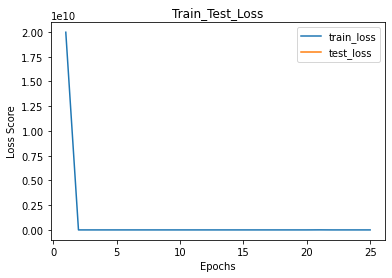

26
Train Epoch: 26 [0/7471 (0%)]	Loss: 3915.463867
Train Epoch: 26 [160/7471 (2%)]	Loss: 3818.522949
Train Epoch: 26 [320/7471 (4%)]	Loss: 4068.168457
Train Epoch: 26 [480/7471 (6%)]	Loss: 4018.129883
Train Epoch: 26 [640/7471 (9%)]	Loss: 3883.156494
Train Epoch: 26 [800/7471 (11%)]	Loss: 3747.865967
Train Epoch: 26 [960/7471 (13%)]	Loss: 4047.132080
Train Epoch: 26 [1120/7471 (15%)]	Loss: 4465.037598
Train Epoch: 26 [1280/7471 (17%)]	Loss: 4581.467285
Train Epoch: 26 [1440/7471 (19%)]	Loss: 4565.192383
Train Epoch: 26 [1600/7471 (21%)]	Loss: 4353.576660
Train Epoch: 26 [1760/7471 (24%)]	Loss: 4216.232422
Train Epoch: 26 [1920/7471 (26%)]	Loss: 4252.228516
Train Epoch: 26 [2080/7471 (28%)]	Loss: 4405.974121
Train Epoch: 26 [2240/7471 (30%)]	Loss: 4303.844727
Train Epoch: 26 [2400/7471 (32%)]	Loss: 4411.330566
Train Epoch: 26 [2560/7471 (34%)]	Loss: 4208.471191
Train Epoch: 26 [2720/7471 (36%)]	Loss: 3768.791016
Train Epoch: 26 [2880/7471 (39%)]	Loss: 4285.911621
Train Epoch: 26 [3040/7

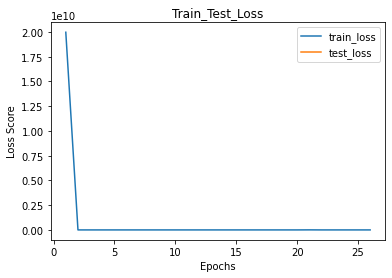

27
Train Epoch: 27 [0/7471 (0%)]	Loss: 4361.439453
Train Epoch: 27 [160/7471 (2%)]	Loss: 4118.458496
Train Epoch: 27 [320/7471 (4%)]	Loss: 4323.746582
Train Epoch: 27 [480/7471 (6%)]	Loss: 4215.213379
Train Epoch: 27 [640/7471 (9%)]	Loss: 3859.900635
Train Epoch: 27 [800/7471 (11%)]	Loss: 3938.702148
Train Epoch: 27 [960/7471 (13%)]	Loss: 4181.285645
Train Epoch: 27 [1120/7471 (15%)]	Loss: 4157.872070
Train Epoch: 27 [1280/7471 (17%)]	Loss: 4286.131836
Train Epoch: 27 [1440/7471 (19%)]	Loss: 3867.938965
Train Epoch: 27 [1600/7471 (21%)]	Loss: 4077.713379
Train Epoch: 27 [1760/7471 (24%)]	Loss: 4131.708008
Train Epoch: 27 [1920/7471 (26%)]	Loss: 4100.434570
Train Epoch: 27 [2080/7471 (28%)]	Loss: 4237.785645
Train Epoch: 27 [2240/7471 (30%)]	Loss: 4277.994141
Train Epoch: 27 [2400/7471 (32%)]	Loss: 4169.220703
Train Epoch: 27 [2560/7471 (34%)]	Loss: 4279.945801
Train Epoch: 27 [2720/7471 (36%)]	Loss: 4636.024902
Train Epoch: 27 [2880/7471 (39%)]	Loss: 4384.995117
Train Epoch: 27 [3040/7

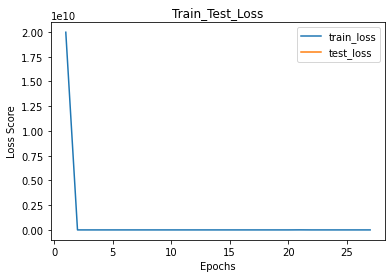

28
Train Epoch: 28 [0/7471 (0%)]	Loss: 4902.155273
Train Epoch: 28 [160/7471 (2%)]	Loss: 4897.258301
Train Epoch: 28 [320/7471 (4%)]	Loss: 4737.910645
Train Epoch: 28 [480/7471 (6%)]	Loss: 4653.769531
Train Epoch: 28 [640/7471 (9%)]	Loss: 4786.752930
Train Epoch: 28 [800/7471 (11%)]	Loss: 4943.954590
Train Epoch: 28 [960/7471 (13%)]	Loss: 5019.552734
Train Epoch: 28 [1120/7471 (15%)]	Loss: 4720.038574
Train Epoch: 28 [1280/7471 (17%)]	Loss: 4960.704102
Train Epoch: 28 [1440/7471 (19%)]	Loss: 4410.440918
Train Epoch: 28 [1600/7471 (21%)]	Loss: 4470.131836
Train Epoch: 28 [1760/7471 (24%)]	Loss: 4548.724121
Train Epoch: 28 [1920/7471 (26%)]	Loss: 4412.332520
Train Epoch: 28 [2080/7471 (28%)]	Loss: 4442.789062
Train Epoch: 28 [2240/7471 (30%)]	Loss: 4754.756836
Train Epoch: 28 [2400/7471 (32%)]	Loss: 4659.453613
Train Epoch: 28 [2560/7471 (34%)]	Loss: 4411.012695
Train Epoch: 28 [2720/7471 (36%)]	Loss: 4676.534668
Train Epoch: 28 [2880/7471 (39%)]	Loss: 4563.014648
Train Epoch: 28 [3040/7

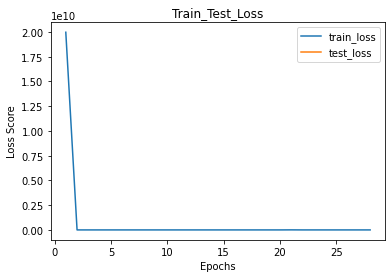

29
Train Epoch: 29 [0/7471 (0%)]	Loss: 4417.836914
Train Epoch: 29 [160/7471 (2%)]	Loss: 4172.973145
Train Epoch: 29 [320/7471 (4%)]	Loss: 4327.718750
Train Epoch: 29 [480/7471 (6%)]	Loss: 4535.035156
Train Epoch: 29 [640/7471 (9%)]	Loss: 4538.708496
Train Epoch: 29 [800/7471 (11%)]	Loss: 4730.489746
Train Epoch: 29 [960/7471 (13%)]	Loss: 4087.698975
Train Epoch: 29 [1120/7471 (15%)]	Loss: 4132.152832
Train Epoch: 29 [1280/7471 (17%)]	Loss: 4381.240234
Train Epoch: 29 [1440/7471 (19%)]	Loss: 4250.998047
Train Epoch: 29 [1600/7471 (21%)]	Loss: 4220.915039
Train Epoch: 29 [1760/7471 (24%)]	Loss: 4597.626465
Train Epoch: 29 [1920/7471 (26%)]	Loss: 4427.618652
Train Epoch: 29 [2080/7471 (28%)]	Loss: 4619.863770
Train Epoch: 29 [2240/7471 (30%)]	Loss: 4239.795898
Train Epoch: 29 [2400/7471 (32%)]	Loss: 4836.527344
Train Epoch: 29 [2560/7471 (34%)]	Loss: 4630.307617
Train Epoch: 29 [2720/7471 (36%)]	Loss: 4160.122070
Train Epoch: 29 [2880/7471 (39%)]	Loss: 4541.507812
Train Epoch: 29 [3040/7

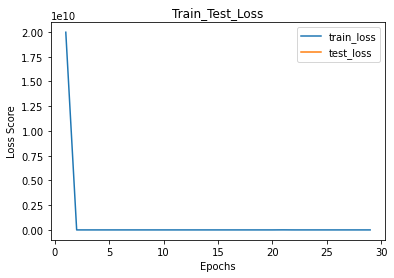

30
Train Epoch: 30 [0/7471 (0%)]	Loss: 5066.649902
Train Epoch: 30 [160/7471 (2%)]	Loss: 5356.331055
Train Epoch: 30 [320/7471 (4%)]	Loss: 5722.821777
Train Epoch: 30 [480/7471 (6%)]	Loss: 5426.814453
Train Epoch: 30 [640/7471 (9%)]	Loss: 5742.778809
Train Epoch: 30 [800/7471 (11%)]	Loss: 5688.596191
Train Epoch: 30 [960/7471 (13%)]	Loss: 5800.293457
Train Epoch: 30 [1120/7471 (15%)]	Loss: 5456.545410
Train Epoch: 30 [1280/7471 (17%)]	Loss: 5784.547363
Train Epoch: 30 [1440/7471 (19%)]	Loss: 5979.142578
Train Epoch: 30 [1600/7471 (21%)]	Loss: 5744.030273
Train Epoch: 30 [1760/7471 (24%)]	Loss: 5937.478027
Train Epoch: 30 [1920/7471 (26%)]	Loss: 5709.399902
Train Epoch: 30 [2080/7471 (28%)]	Loss: 6170.120117
Train Epoch: 30 [2240/7471 (30%)]	Loss: 6186.071289
Train Epoch: 30 [2400/7471 (32%)]	Loss: 5921.520020
Train Epoch: 30 [2560/7471 (34%)]	Loss: 6152.782227
Train Epoch: 30 [2720/7471 (36%)]	Loss: 6232.435059
Train Epoch: 30 [2880/7471 (39%)]	Loss: 6323.569824
Train Epoch: 30 [3040/7

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


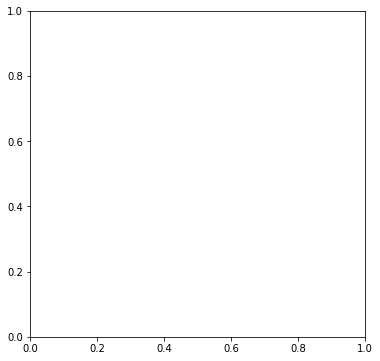

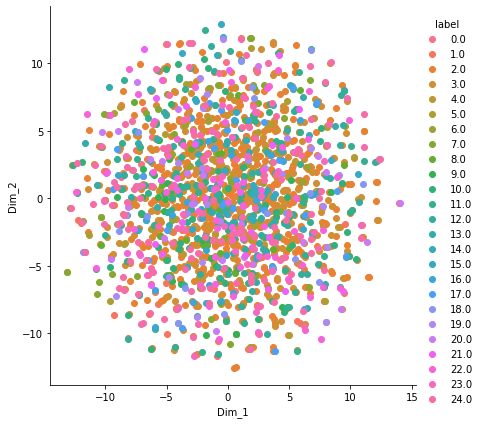

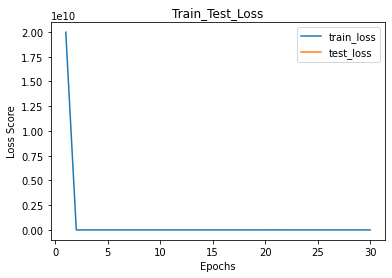

31
Train Epoch: 31 [0/7471 (0%)]	Loss: 5789.398926
Train Epoch: 31 [160/7471 (2%)]	Loss: 5925.365723
Train Epoch: 31 [320/7471 (4%)]	Loss: 6039.731934
Train Epoch: 31 [480/7471 (6%)]	Loss: 6245.151367
Train Epoch: 31 [640/7471 (9%)]	Loss: 5847.111328
Train Epoch: 31 [800/7471 (11%)]	Loss: 6531.182617
Train Epoch: 31 [960/7471 (13%)]	Loss: 6163.931641
Train Epoch: 31 [1120/7471 (15%)]	Loss: 5755.303711
Train Epoch: 31 [1280/7471 (17%)]	Loss: 5809.737305
Train Epoch: 31 [1440/7471 (19%)]	Loss: 5952.672363
Train Epoch: 31 [1600/7471 (21%)]	Loss: 6152.343750
Train Epoch: 31 [1760/7471 (24%)]	Loss: 6645.448730
Train Epoch: 31 [1920/7471 (26%)]	Loss: 6461.115723
Train Epoch: 31 [2080/7471 (28%)]	Loss: 5725.497070
Train Epoch: 31 [2240/7471 (30%)]	Loss: 6271.629395
Train Epoch: 31 [2400/7471 (32%)]	Loss: 6164.076172
Train Epoch: 31 [2560/7471 (34%)]	Loss: 6158.377441
Train Epoch: 31 [2720/7471 (36%)]	Loss: 6283.505859
Train Epoch: 31 [2880/7471 (39%)]	Loss: 5978.284668
Train Epoch: 31 [3040/7

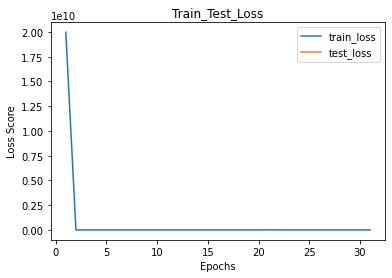

32
Train Epoch: 32 [0/7471 (0%)]	Loss: 6289.804199
Train Epoch: 32 [160/7471 (2%)]	Loss: 6352.358398
Train Epoch: 32 [320/7471 (4%)]	Loss: 6497.368164
Train Epoch: 32 [480/7471 (6%)]	Loss: 6478.621094
Train Epoch: 32 [640/7471 (9%)]	Loss: 6328.779297
Train Epoch: 32 [800/7471 (11%)]	Loss: 6789.104980
Train Epoch: 32 [960/7471 (13%)]	Loss: 6638.955078
Train Epoch: 32 [1120/7471 (15%)]	Loss: 6562.183594
Train Epoch: 32 [1280/7471 (17%)]	Loss: 6391.929688
Train Epoch: 32 [1440/7471 (19%)]	Loss: 5840.610352
Train Epoch: 32 [1600/7471 (21%)]	Loss: 6274.243652
Train Epoch: 32 [1760/7471 (24%)]	Loss: 6275.618164
Train Epoch: 32 [1920/7471 (26%)]	Loss: 6137.674805
Train Epoch: 32 [2080/7471 (28%)]	Loss: 6332.974121
Train Epoch: 32 [2240/7471 (30%)]	Loss: 6474.522949
Train Epoch: 32 [2400/7471 (32%)]	Loss: 6228.311035
Train Epoch: 32 [2560/7471 (34%)]	Loss: 6280.935059
Train Epoch: 32 [2720/7471 (36%)]	Loss: 6160.594238
Train Epoch: 32 [2880/7471 (39%)]	Loss: 6272.165527
Train Epoch: 32 [3040/7

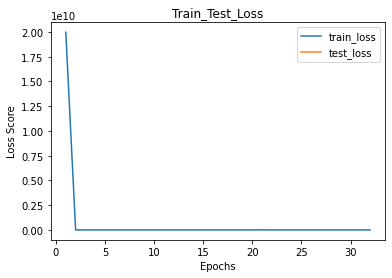

33
Train Epoch: 33 [0/7471 (0%)]	Loss: 7398.616211
Train Epoch: 33 [160/7471 (2%)]	Loss: 6957.249023
Train Epoch: 33 [320/7471 (4%)]	Loss: 7526.677246
Train Epoch: 33 [480/7471 (6%)]	Loss: 7833.636719
Train Epoch: 33 [640/7471 (9%)]	Loss: 6834.346191
Train Epoch: 33 [800/7471 (11%)]	Loss: 7425.229980
Train Epoch: 33 [960/7471 (13%)]	Loss: 7752.170410
Train Epoch: 33 [1120/7471 (15%)]	Loss: 7495.215332
Train Epoch: 33 [1280/7471 (17%)]	Loss: 7422.684570
Train Epoch: 33 [1440/7471 (19%)]	Loss: 7101.563477
Train Epoch: 33 [1600/7471 (21%)]	Loss: 7582.531738
Train Epoch: 33 [1760/7471 (24%)]	Loss: 8056.219238
Train Epoch: 33 [1920/7471 (26%)]	Loss: 7933.162598
Train Epoch: 33 [2080/7471 (28%)]	Loss: 7614.320801
Train Epoch: 33 [2240/7471 (30%)]	Loss: 7861.791504
Train Epoch: 33 [2400/7471 (32%)]	Loss: 7534.612793
Train Epoch: 33 [2560/7471 (34%)]	Loss: 7503.124023
Train Epoch: 33 [2720/7471 (36%)]	Loss: 7246.869141
Train Epoch: 33 [2880/7471 (39%)]	Loss: 6882.601562
Train Epoch: 33 [3040/7

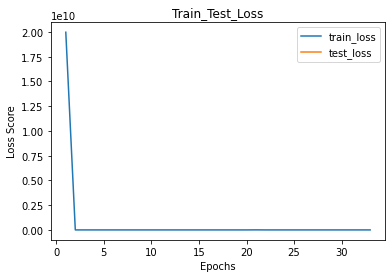

34
Train Epoch: 34 [0/7471 (0%)]	Loss: 7881.715332
Train Epoch: 34 [160/7471 (2%)]	Loss: 7565.466797
Train Epoch: 34 [320/7471 (4%)]	Loss: 8279.858398
Train Epoch: 34 [480/7471 (6%)]	Loss: 7721.812988
Train Epoch: 34 [640/7471 (9%)]	Loss: 8220.399414
Train Epoch: 34 [800/7471 (11%)]	Loss: 7956.354980
Train Epoch: 34 [960/7471 (13%)]	Loss: 8072.561523
Train Epoch: 34 [1120/7471 (15%)]	Loss: 8210.015625
Train Epoch: 34 [1280/7471 (17%)]	Loss: 8047.824219
Train Epoch: 34 [1440/7471 (19%)]	Loss: 7482.586426
Train Epoch: 34 [1600/7471 (21%)]	Loss: 8233.394531
Train Epoch: 34 [1760/7471 (24%)]	Loss: 7855.061035
Train Epoch: 34 [1920/7471 (26%)]	Loss: 8363.300781
Train Epoch: 34 [2080/7471 (28%)]	Loss: 8364.887695
Train Epoch: 34 [2240/7471 (30%)]	Loss: 8009.326660
Train Epoch: 34 [2400/7471 (32%)]	Loss: 7997.052246
Train Epoch: 34 [2560/7471 (34%)]	Loss: 7601.797363
Train Epoch: 34 [2720/7471 (36%)]	Loss: 8725.091797
Train Epoch: 34 [2880/7471 (39%)]	Loss: 8394.465820
Train Epoch: 34 [3040/7

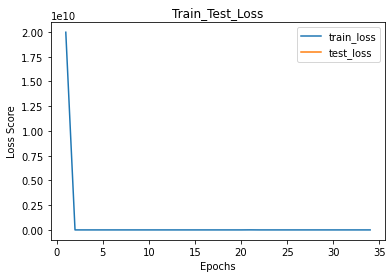

35
Train Epoch: 35 [0/7471 (0%)]	Loss: 9007.441406
Train Epoch: 35 [160/7471 (2%)]	Loss: 9082.738281
Train Epoch: 35 [320/7471 (4%)]	Loss: 9221.232422
Train Epoch: 35 [480/7471 (6%)]	Loss: 8575.842773
Train Epoch: 35 [640/7471 (9%)]	Loss: 8500.588867
Train Epoch: 35 [800/7471 (11%)]	Loss: 9105.275391
Train Epoch: 35 [960/7471 (13%)]	Loss: 9315.796875
Train Epoch: 35 [1120/7471 (15%)]	Loss: 8727.418945
Train Epoch: 35 [1280/7471 (17%)]	Loss: 8468.501953
Train Epoch: 35 [1440/7471 (19%)]	Loss: 9306.335938
Train Epoch: 35 [1600/7471 (21%)]	Loss: 8493.413086
Train Epoch: 35 [1760/7471 (24%)]	Loss: 9234.152344
Train Epoch: 35 [1920/7471 (26%)]	Loss: 8284.581055
Train Epoch: 35 [2080/7471 (28%)]	Loss: 9009.539062
Train Epoch: 35 [2240/7471 (30%)]	Loss: 9536.255859
Train Epoch: 35 [2400/7471 (32%)]	Loss: 9216.543945
Train Epoch: 35 [2560/7471 (34%)]	Loss: 9306.315430
Train Epoch: 35 [2720/7471 (36%)]	Loss: 9765.216797
Train Epoch: 35 [2880/7471 (39%)]	Loss: 9590.557617
Train Epoch: 35 [3040/7

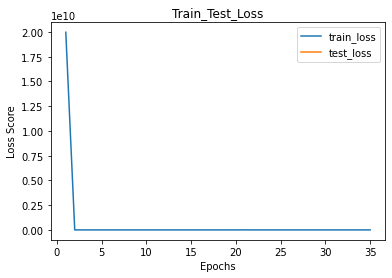

36
Train Epoch: 36 [0/7471 (0%)]	Loss: 8639.448242
Train Epoch: 36 [160/7471 (2%)]	Loss: 8604.020508
Train Epoch: 36 [320/7471 (4%)]	Loss: 7761.984863
Train Epoch: 36 [480/7471 (6%)]	Loss: 8711.548828
Train Epoch: 36 [640/7471 (9%)]	Loss: 8606.924805
Train Epoch: 36 [800/7471 (11%)]	Loss: 8819.728516
Train Epoch: 36 [960/7471 (13%)]	Loss: 8939.773438
Train Epoch: 36 [1120/7471 (15%)]	Loss: 8897.642578
Train Epoch: 36 [1280/7471 (17%)]	Loss: 8578.196289
Train Epoch: 36 [1440/7471 (19%)]	Loss: 9424.437500
Train Epoch: 36 [1600/7471 (21%)]	Loss: 8914.974609
Train Epoch: 36 [1760/7471 (24%)]	Loss: 8196.355469
Train Epoch: 36 [1920/7471 (26%)]	Loss: 7681.850098
Train Epoch: 36 [2080/7471 (28%)]	Loss: 8122.494629
Train Epoch: 36 [2240/7471 (30%)]	Loss: 8221.608398
Train Epoch: 36 [2400/7471 (32%)]	Loss: 8450.612305
Train Epoch: 36 [2560/7471 (34%)]	Loss: 8384.298828
Train Epoch: 36 [2720/7471 (36%)]	Loss: 8017.789062
Train Epoch: 36 [2880/7471 (39%)]	Loss: 8348.581055
Train Epoch: 36 [3040/7

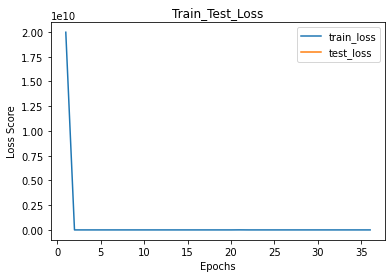

37
Train Epoch: 37 [0/7471 (0%)]	Loss: 8611.228516
Train Epoch: 37 [160/7471 (2%)]	Loss: 8108.232422
Train Epoch: 37 [320/7471 (4%)]	Loss: 8876.945312
Train Epoch: 37 [480/7471 (6%)]	Loss: 8391.739258
Train Epoch: 37 [640/7471 (9%)]	Loss: 8594.708984
Train Epoch: 37 [800/7471 (11%)]	Loss: 630828.500000
Train Epoch: 37 [960/7471 (13%)]	Loss: 9051.201172
Train Epoch: 37 [1120/7471 (15%)]	Loss: 8298.604492
Train Epoch: 37 [1280/7471 (17%)]	Loss: 8683.398438
Train Epoch: 37 [1440/7471 (19%)]	Loss: 8705.835938
Train Epoch: 37 [1600/7471 (21%)]	Loss: 8744.752930
Train Epoch: 37 [1760/7471 (24%)]	Loss: 8669.026367
Train Epoch: 37 [1920/7471 (26%)]	Loss: 8800.846680
Train Epoch: 37 [2080/7471 (28%)]	Loss: 9073.672852
Train Epoch: 37 [2240/7471 (30%)]	Loss: 8300.249023
Train Epoch: 37 [2400/7471 (32%)]	Loss: 8822.734375
Train Epoch: 37 [2560/7471 (34%)]	Loss: 9245.683594
Train Epoch: 37 [2720/7471 (36%)]	Loss: 9212.133789
Train Epoch: 37 [2880/7471 (39%)]	Loss: 9117.050781
Train Epoch: 37 [3040

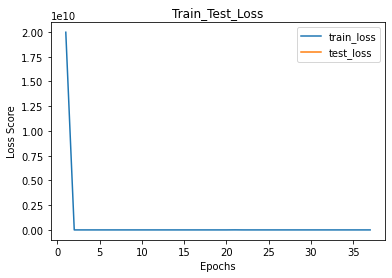

38
Train Epoch: 38 [0/7471 (0%)]	Loss: 9321.823242
Train Epoch: 38 [160/7471 (2%)]	Loss: 8893.474609
Train Epoch: 38 [320/7471 (4%)]	Loss: 8030.928223
Train Epoch: 38 [480/7471 (6%)]	Loss: 8237.148438
Train Epoch: 38 [640/7471 (9%)]	Loss: 8866.392578
Train Epoch: 38 [800/7471 (11%)]	Loss: 7809.089355
Train Epoch: 38 [960/7471 (13%)]	Loss: 8691.404297
Train Epoch: 38 [1120/7471 (15%)]	Loss: 9118.421875
Train Epoch: 38 [1280/7471 (17%)]	Loss: 9091.940430
Train Epoch: 38 [1440/7471 (19%)]	Loss: 8239.612305
Train Epoch: 38 [1600/7471 (21%)]	Loss: 8421.318359
Train Epoch: 38 [1760/7471 (24%)]	Loss: 8292.664062
Train Epoch: 38 [1920/7471 (26%)]	Loss: 8471.866211
Train Epoch: 38 [2080/7471 (28%)]	Loss: 9323.205078
Train Epoch: 38 [2240/7471 (30%)]	Loss: 8627.846680
Train Epoch: 38 [2400/7471 (32%)]	Loss: 8522.374023
Train Epoch: 38 [2560/7471 (34%)]	Loss: 8773.260742
Train Epoch: 38 [2720/7471 (36%)]	Loss: 9276.137695
Train Epoch: 38 [2880/7471 (39%)]	Loss: 8906.449219
Train Epoch: 38 [3040/7

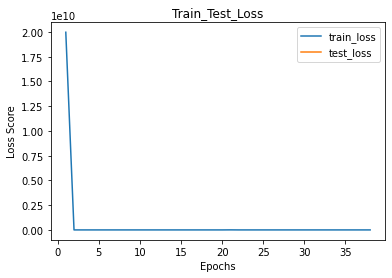

39
Train Epoch: 39 [0/7471 (0%)]	Loss: 9197.392578
Train Epoch: 39 [160/7471 (2%)]	Loss: 7907.822266
Train Epoch: 39 [320/7471 (4%)]	Loss: 8765.539062
Train Epoch: 39 [480/7471 (6%)]	Loss: 8367.164062
Train Epoch: 39 [640/7471 (9%)]	Loss: 9039.316406
Train Epoch: 39 [800/7471 (11%)]	Loss: 8964.752930
Train Epoch: 39 [960/7471 (13%)]	Loss: 9268.611328
Train Epoch: 39 [1120/7471 (15%)]	Loss: 8703.854492
Train Epoch: 39 [1280/7471 (17%)]	Loss: 9400.900391
Train Epoch: 39 [1440/7471 (19%)]	Loss: 9373.750977
Train Epoch: 39 [1600/7471 (21%)]	Loss: 9015.806641
Train Epoch: 39 [1760/7471 (24%)]	Loss: 8634.155273
Train Epoch: 39 [1920/7471 (26%)]	Loss: 9140.516602
Train Epoch: 39 [2080/7471 (28%)]	Loss: 9701.105469
Train Epoch: 39 [2240/7471 (30%)]	Loss: 9242.390625
Train Epoch: 39 [2400/7471 (32%)]	Loss: 9324.705078
Train Epoch: 39 [2560/7471 (34%)]	Loss: 9131.331055
Train Epoch: 39 [2720/7471 (36%)]	Loss: 9253.282227
Train Epoch: 39 [2880/7471 (39%)]	Loss: 9147.998047
Train Epoch: 39 [3040/7

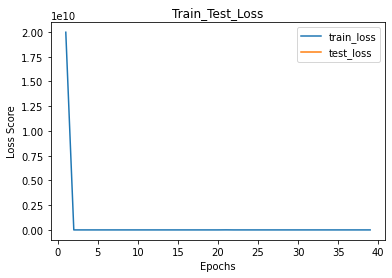

40
Train Epoch: 40 [0/7471 (0%)]	Loss: 8636.077148
Train Epoch: 40 [160/7471 (2%)]	Loss: 8513.623047
Train Epoch: 40 [320/7471 (4%)]	Loss: 8782.020508
Train Epoch: 40 [480/7471 (6%)]	Loss: 8393.397461
Train Epoch: 40 [640/7471 (9%)]	Loss: 8787.226562
Train Epoch: 40 [800/7471 (11%)]	Loss: 9097.248047
Train Epoch: 40 [960/7471 (13%)]	Loss: 8996.146484
Train Epoch: 40 [1120/7471 (15%)]	Loss: 8494.190430
Train Epoch: 40 [1280/7471 (17%)]	Loss: 8161.256836
Train Epoch: 40 [1440/7471 (19%)]	Loss: 8871.293945
Train Epoch: 40 [1600/7471 (21%)]	Loss: 8045.147461
Train Epoch: 40 [1760/7471 (24%)]	Loss: 8513.468750
Train Epoch: 40 [1920/7471 (26%)]	Loss: 8372.615234
Train Epoch: 40 [2080/7471 (28%)]	Loss: 8441.636719
Train Epoch: 40 [2240/7471 (30%)]	Loss: 7993.631348
Train Epoch: 40 [2400/7471 (32%)]	Loss: 7904.838867
Train Epoch: 40 [2560/7471 (34%)]	Loss: 7675.541016
Train Epoch: 40 [2720/7471 (36%)]	Loss: 8576.080078
Train Epoch: 40 [2880/7471 (39%)]	Loss: 7982.191895
Train Epoch: 40 [3040/7

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


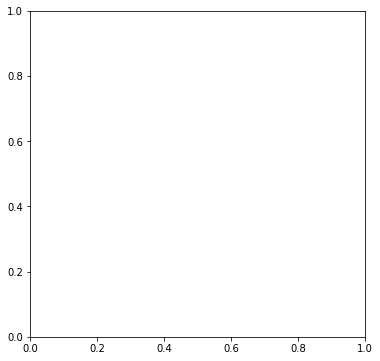

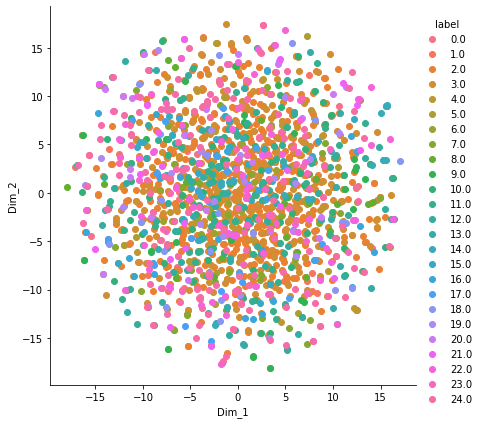

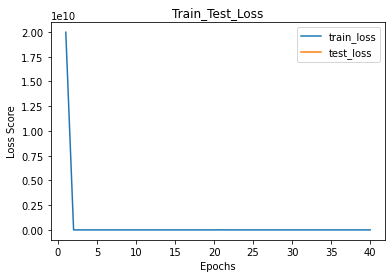

41
Train Epoch: 41 [0/7471 (0%)]	Loss: 7497.310547
Train Epoch: 41 [160/7471 (2%)]	Loss: 7652.582031
Train Epoch: 41 [320/7471 (4%)]	Loss: 8391.478516
Train Epoch: 41 [480/7471 (6%)]	Loss: 7723.677246
Train Epoch: 41 [640/7471 (9%)]	Loss: 7963.520996
Train Epoch: 41 [800/7471 (11%)]	Loss: 7841.328125
Train Epoch: 41 [960/7471 (13%)]	Loss: 7980.056152
Train Epoch: 41 [1120/7471 (15%)]	Loss: 7786.857422
Train Epoch: 41 [1280/7471 (17%)]	Loss: 8482.252930
Train Epoch: 41 [1440/7471 (19%)]	Loss: 8359.121094
Train Epoch: 41 [1600/7471 (21%)]	Loss: 8274.839844
Train Epoch: 41 [1760/7471 (24%)]	Loss: 7643.739746
Train Epoch: 41 [1920/7471 (26%)]	Loss: 8169.029297
Train Epoch: 41 [2080/7471 (28%)]	Loss: 8457.380859
Train Epoch: 41 [2240/7471 (30%)]	Loss: 8032.942871
Train Epoch: 41 [2400/7471 (32%)]	Loss: 8244.385742
Train Epoch: 41 [2560/7471 (34%)]	Loss: 8005.996094
Train Epoch: 41 [2720/7471 (36%)]	Loss: 8220.037109
Train Epoch: 41 [2880/7471 (39%)]	Loss: 8225.914062
Train Epoch: 41 [3040/7

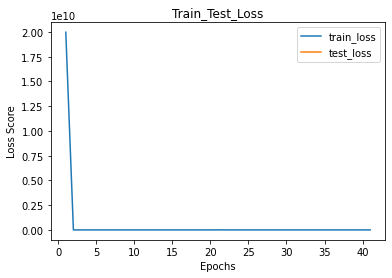

42
Train Epoch: 42 [0/7471 (0%)]	Loss: 8290.156250
Train Epoch: 42 [160/7471 (2%)]	Loss: 8091.438477
Train Epoch: 42 [320/7471 (4%)]	Loss: 8064.525879
Train Epoch: 42 [480/7471 (6%)]	Loss: 7731.687012
Train Epoch: 42 [640/7471 (9%)]	Loss: 7576.792480
Train Epoch: 42 [800/7471 (11%)]	Loss: 7522.749023
Train Epoch: 42 [960/7471 (13%)]	Loss: 7674.361816
Train Epoch: 42 [1120/7471 (15%)]	Loss: 7656.342285
Train Epoch: 42 [1280/7471 (17%)]	Loss: 7230.655273
Train Epoch: 42 [1440/7471 (19%)]	Loss: 7315.208496
Train Epoch: 42 [1600/7471 (21%)]	Loss: 7583.532227
Train Epoch: 42 [1760/7471 (24%)]	Loss: 7682.976074
Train Epoch: 42 [1920/7471 (26%)]	Loss: 8206.363281
Train Epoch: 42 [2080/7471 (28%)]	Loss: 7741.222168
Train Epoch: 42 [2240/7471 (30%)]	Loss: 7505.137207
Train Epoch: 42 [2400/7471 (32%)]	Loss: 7676.832520
Train Epoch: 42 [2560/7471 (34%)]	Loss: 7219.736328
Train Epoch: 42 [2720/7471 (36%)]	Loss: 7444.859863
Train Epoch: 42 [2880/7471 (39%)]	Loss: 7084.007324
Train Epoch: 42 [3040/7

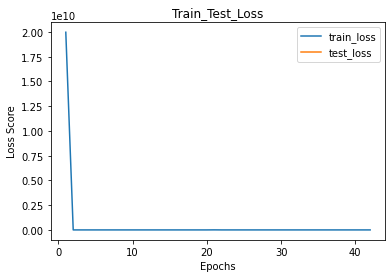

43
Train Epoch: 43 [0/7471 (0%)]	Loss: 6777.377930
Train Epoch: 43 [160/7471 (2%)]	Loss: 7014.767578
Train Epoch: 43 [320/7471 (4%)]	Loss: 7524.822754
Train Epoch: 43 [480/7471 (6%)]	Loss: 7682.759277
Train Epoch: 43 [640/7471 (9%)]	Loss: 7513.502441
Train Epoch: 43 [800/7471 (11%)]	Loss: 7400.307617
Train Epoch: 43 [960/7471 (13%)]	Loss: 6786.643555
Train Epoch: 43 [1120/7471 (15%)]	Loss: 6876.336426
Train Epoch: 43 [1280/7471 (17%)]	Loss: 6943.034180
Train Epoch: 43 [1440/7471 (19%)]	Loss: 7334.395996
Train Epoch: 43 [1600/7471 (21%)]	Loss: 6656.696289
Train Epoch: 43 [1760/7471 (24%)]	Loss: 7002.083984
Train Epoch: 43 [1920/7471 (26%)]	Loss: 7359.379395
Train Epoch: 43 [2080/7471 (28%)]	Loss: 6822.817871
Train Epoch: 43 [2240/7471 (30%)]	Loss: 6950.607910
Train Epoch: 43 [2400/7471 (32%)]	Loss: 6928.000000
Train Epoch: 43 [2560/7471 (34%)]	Loss: 7018.553711
Train Epoch: 43 [2720/7471 (36%)]	Loss: 7113.749023
Train Epoch: 43 [2880/7471 (39%)]	Loss: 6425.000000
Train Epoch: 43 [3040/7

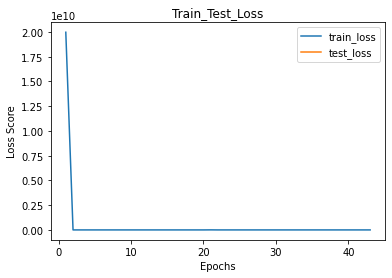

44
Train Epoch: 44 [0/7471 (0%)]	Loss: 6609.763672
Train Epoch: 44 [160/7471 (2%)]	Loss: 6635.312012
Train Epoch: 44 [320/7471 (4%)]	Loss: 7001.840820
Train Epoch: 44 [480/7471 (6%)]	Loss: 6000.964355
Train Epoch: 44 [640/7471 (9%)]	Loss: 6627.333008
Train Epoch: 44 [800/7471 (11%)]	Loss: 6413.503418
Train Epoch: 44 [960/7471 (13%)]	Loss: 6368.059570
Train Epoch: 44 [1120/7471 (15%)]	Loss: 6059.406738
Train Epoch: 44 [1280/7471 (17%)]	Loss: 6392.014160
Train Epoch: 44 [1440/7471 (19%)]	Loss: 6696.501465
Train Epoch: 44 [1600/7471 (21%)]	Loss: 6294.522949
Train Epoch: 44 [1760/7471 (24%)]	Loss: 6766.925781
Train Epoch: 44 [1920/7471 (26%)]	Loss: 6733.237793
Train Epoch: 44 [2080/7471 (28%)]	Loss: 6910.344727
Train Epoch: 44 [2240/7471 (30%)]	Loss: 7003.522949
Train Epoch: 44 [2400/7471 (32%)]	Loss: 7376.483398
Train Epoch: 44 [2560/7471 (34%)]	Loss: 7704.381348
Train Epoch: 44 [2720/7471 (36%)]	Loss: 7281.727051
Train Epoch: 44 [2880/7471 (39%)]	Loss: 7239.330566
Train Epoch: 44 [3040/7

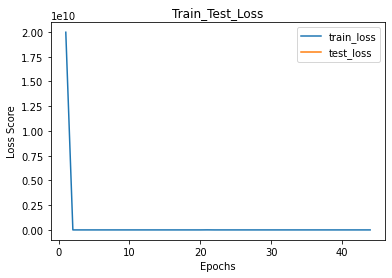

45
Train Epoch: 45 [0/7471 (0%)]	Loss: 6926.199707
Train Epoch: 45 [160/7471 (2%)]	Loss: 6408.269531
Train Epoch: 45 [320/7471 (4%)]	Loss: 6754.308594
Train Epoch: 45 [480/7471 (6%)]	Loss: 6771.599121
Train Epoch: 45 [640/7471 (9%)]	Loss: 6446.364746
Train Epoch: 45 [800/7471 (11%)]	Loss: 6184.117676
Train Epoch: 45 [960/7471 (13%)]	Loss: 6949.982910
Train Epoch: 45 [1120/7471 (15%)]	Loss: 6362.707520
Train Epoch: 45 [1280/7471 (17%)]	Loss: 6753.545898
Train Epoch: 45 [1440/7471 (19%)]	Loss: 6445.764648
Train Epoch: 45 [1600/7471 (21%)]	Loss: 6657.335449
Train Epoch: 45 [1760/7471 (24%)]	Loss: 6522.731445
Train Epoch: 45 [1920/7471 (26%)]	Loss: 6970.907227
Train Epoch: 45 [2080/7471 (28%)]	Loss: 6716.139648
Train Epoch: 45 [2240/7471 (30%)]	Loss: 7403.594727
Train Epoch: 45 [2400/7471 (32%)]	Loss: 6835.267578
Train Epoch: 45 [2560/7471 (34%)]	Loss: 6654.730469
Train Epoch: 45 [2720/7471 (36%)]	Loss: 7035.727051
Train Epoch: 45 [2880/7471 (39%)]	Loss: 6743.801270
Train Epoch: 45 [3040/7

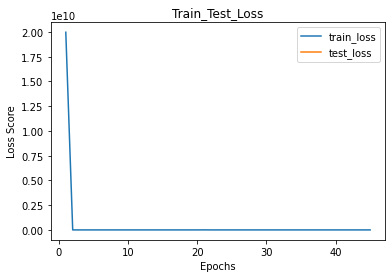

46
Train Epoch: 46 [0/7471 (0%)]	Loss: 6312.160645
Train Epoch: 46 [160/7471 (2%)]	Loss: 6232.626465
Train Epoch: 46 [320/7471 (4%)]	Loss: 5760.701172
Train Epoch: 46 [480/7471 (6%)]	Loss: 6222.788086
Train Epoch: 46 [640/7471 (9%)]	Loss: 5938.187012
Train Epoch: 46 [800/7471 (11%)]	Loss: 6090.477539
Train Epoch: 46 [960/7471 (13%)]	Loss: 6348.862793
Train Epoch: 46 [1120/7471 (15%)]	Loss: 6517.973145
Train Epoch: 46 [1280/7471 (17%)]	Loss: 6310.805664
Train Epoch: 46 [1440/7471 (19%)]	Loss: 6198.833496
Train Epoch: 46 [1600/7471 (21%)]	Loss: 6086.289551
Train Epoch: 46 [1760/7471 (24%)]	Loss: 6250.875488
Train Epoch: 46 [1920/7471 (26%)]	Loss: 6234.646484
Train Epoch: 46 [2080/7471 (28%)]	Loss: 6044.465820
Train Epoch: 46 [2240/7471 (30%)]	Loss: 6405.146484
Train Epoch: 46 [2400/7471 (32%)]	Loss: 6428.876465
Train Epoch: 46 [2560/7471 (34%)]	Loss: 6163.975586
Train Epoch: 46 [2720/7471 (36%)]	Loss: 6321.115723
Train Epoch: 46 [2880/7471 (39%)]	Loss: 6370.624512
Train Epoch: 46 [3040/7

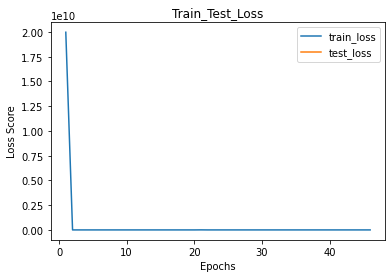

47
Train Epoch: 47 [0/7471 (0%)]	Loss: 5530.143066
Train Epoch: 47 [160/7471 (2%)]	Loss: 5260.263184
Train Epoch: 47 [320/7471 (4%)]	Loss: 4935.047363
Train Epoch: 47 [480/7471 (6%)]	Loss: 5461.985840
Train Epoch: 47 [640/7471 (9%)]	Loss: 5770.266113
Train Epoch: 47 [800/7471 (11%)]	Loss: 5182.249512
Train Epoch: 47 [960/7471 (13%)]	Loss: 4952.804688
Train Epoch: 47 [1120/7471 (15%)]	Loss: 5265.444824
Train Epoch: 47 [1280/7471 (17%)]	Loss: 5546.461914
Train Epoch: 47 [1440/7471 (19%)]	Loss: 5520.325684
Train Epoch: 47 [1600/7471 (21%)]	Loss: 5160.229004
Train Epoch: 47 [1760/7471 (24%)]	Loss: 5222.624512
Train Epoch: 47 [1920/7471 (26%)]	Loss: 5419.942383
Train Epoch: 47 [2080/7471 (28%)]	Loss: 5018.270020
Train Epoch: 47 [2240/7471 (30%)]	Loss: 5489.630371
Train Epoch: 47 [2400/7471 (32%)]	Loss: 5018.081055
Train Epoch: 47 [2560/7471 (34%)]	Loss: 5309.907715
Train Epoch: 47 [2720/7471 (36%)]	Loss: 5526.236816
Train Epoch: 47 [2880/7471 (39%)]	Loss: 5441.169922
Train Epoch: 47 [3040/7

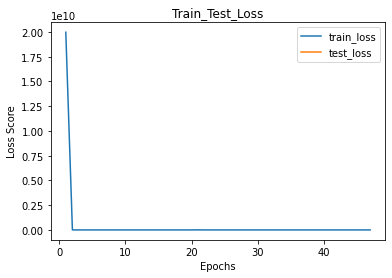

48
Train Epoch: 48 [0/7471 (0%)]	Loss: 5227.586426
Train Epoch: 48 [160/7471 (2%)]	Loss: 5709.356934
Train Epoch: 48 [320/7471 (4%)]	Loss: 5235.041504
Train Epoch: 48 [480/7471 (6%)]	Loss: 5475.723633
Train Epoch: 48 [640/7471 (9%)]	Loss: 5142.536621
Train Epoch: 48 [800/7471 (11%)]	Loss: 4933.540039
Train Epoch: 48 [960/7471 (13%)]	Loss: 5406.559082
Train Epoch: 48 [1120/7471 (15%)]	Loss: 5488.060059
Train Epoch: 48 [1280/7471 (17%)]	Loss: 5600.992188
Train Epoch: 48 [1440/7471 (19%)]	Loss: 5614.501953
Train Epoch: 48 [1600/7471 (21%)]	Loss: 5651.201172
Train Epoch: 48 [1760/7471 (24%)]	Loss: 5614.590820
Train Epoch: 48 [1920/7471 (26%)]	Loss: 5393.747070
Train Epoch: 48 [2080/7471 (28%)]	Loss: 5588.519531
Train Epoch: 48 [2240/7471 (30%)]	Loss: 5325.237305
Train Epoch: 48 [2400/7471 (32%)]	Loss: 5135.205566
Train Epoch: 48 [2560/7471 (34%)]	Loss: 5367.567871
Train Epoch: 48 [2720/7471 (36%)]	Loss: 5331.407227
Train Epoch: 48 [2880/7471 (39%)]	Loss: 5288.103027
Train Epoch: 48 [3040/7

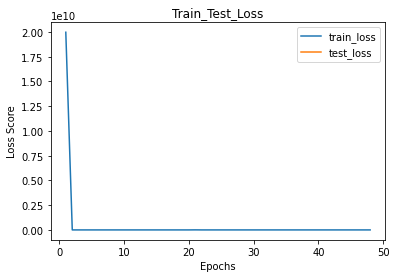

49
Train Epoch: 49 [0/7471 (0%)]	Loss: 4912.820312
Train Epoch: 49 [160/7471 (2%)]	Loss: 4747.317871
Train Epoch: 49 [320/7471 (4%)]	Loss: 4792.371094
Train Epoch: 49 [480/7471 (6%)]	Loss: 4676.646484
Train Epoch: 49 [640/7471 (9%)]	Loss: 4912.872559
Train Epoch: 49 [800/7471 (11%)]	Loss: 5283.786133
Train Epoch: 49 [960/7471 (13%)]	Loss: 5247.875977
Train Epoch: 49 [1120/7471 (15%)]	Loss: 4833.722168
Train Epoch: 49 [1280/7471 (17%)]	Loss: 5176.440430
Train Epoch: 49 [1440/7471 (19%)]	Loss: 5109.792969
Train Epoch: 49 [1600/7471 (21%)]	Loss: 4829.940430
Train Epoch: 49 [1760/7471 (24%)]	Loss: 5037.005859
Train Epoch: 49 [1920/7471 (26%)]	Loss: 4897.273926
Train Epoch: 49 [2080/7471 (28%)]	Loss: 4647.075195
Train Epoch: 49 [2240/7471 (30%)]	Loss: 5041.306152
Train Epoch: 49 [2400/7471 (32%)]	Loss: 5116.140137
Train Epoch: 49 [2560/7471 (34%)]	Loss: 4923.772461
Train Epoch: 49 [2720/7471 (36%)]	Loss: 4831.183594
Train Epoch: 49 [2880/7471 (39%)]	Loss: 4641.040527
Train Epoch: 49 [3040/7

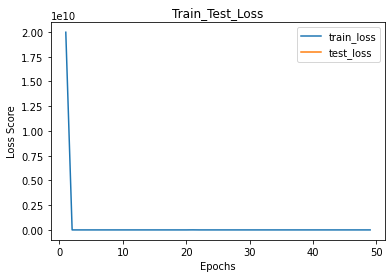

50
Train Epoch: 50 [0/7471 (0%)]	Loss: 4172.339844
Train Epoch: 50 [160/7471 (2%)]	Loss: 4546.208008
Train Epoch: 50 [320/7471 (4%)]	Loss: 4724.788574
Train Epoch: 50 [480/7471 (6%)]	Loss: 4882.830078
Train Epoch: 50 [640/7471 (9%)]	Loss: 4551.029785
Train Epoch: 50 [800/7471 (11%)]	Loss: 4594.068359
Train Epoch: 50 [960/7471 (13%)]	Loss: 4792.974609
Train Epoch: 50 [1120/7471 (15%)]	Loss: 4727.199219
Train Epoch: 50 [1280/7471 (17%)]	Loss: 4880.575195
Train Epoch: 50 [1440/7471 (19%)]	Loss: 4857.009766
Train Epoch: 50 [1600/7471 (21%)]	Loss: 4842.520508
Train Epoch: 50 [1760/7471 (24%)]	Loss: 4720.981934
Train Epoch: 50 [1920/7471 (26%)]	Loss: 4988.262695
Train Epoch: 50 [2080/7471 (28%)]	Loss: 5106.140625
Train Epoch: 50 [2240/7471 (30%)]	Loss: 5095.295898
Train Epoch: 50 [2400/7471 (32%)]	Loss: 4767.326660
Train Epoch: 50 [2560/7471 (34%)]	Loss: 5155.045898
Train Epoch: 50 [2720/7471 (36%)]	Loss: 9228.201172
Train Epoch: 50 [2880/7471 (39%)]	Loss: 4885.540039
Train Epoch: 50 [3040/7

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


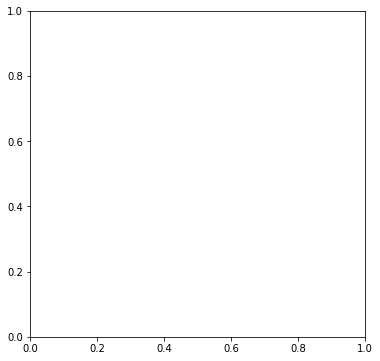

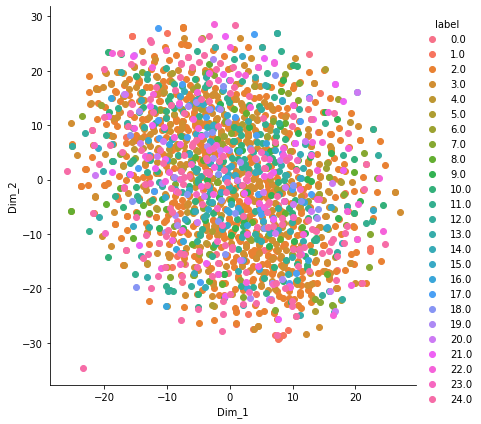

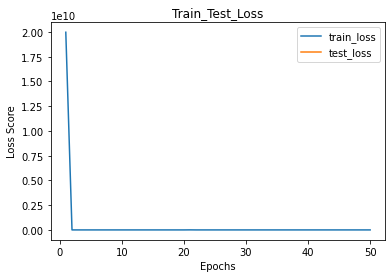

51
Train Epoch: 51 [0/7471 (0%)]	Loss: 4349.814941
Train Epoch: 51 [160/7471 (2%)]	Loss: 5260.281738
Train Epoch: 51 [320/7471 (4%)]	Loss: 5195.855469
Train Epoch: 51 [480/7471 (6%)]	Loss: 5165.171875
Train Epoch: 51 [640/7471 (9%)]	Loss: 5227.152344
Train Epoch: 51 [800/7471 (11%)]	Loss: 5281.944824
Train Epoch: 51 [960/7471 (13%)]	Loss: 5133.565918
Train Epoch: 51 [1120/7471 (15%)]	Loss: 5895.985840
Train Epoch: 51 [1280/7471 (17%)]	Loss: 5257.372559
Train Epoch: 51 [1440/7471 (19%)]	Loss: 5553.290527
Train Epoch: 51 [1600/7471 (21%)]	Loss: 180017.515625
Train Epoch: 51 [1760/7471 (24%)]	Loss: 5410.397461
Train Epoch: 51 [1920/7471 (26%)]	Loss: 5485.095215
Train Epoch: 51 [2080/7471 (28%)]	Loss: 5019.654785
Train Epoch: 51 [2240/7471 (30%)]	Loss: 5434.109863
Train Epoch: 51 [2400/7471 (32%)]	Loss: 5647.687988
Train Epoch: 51 [2560/7471 (34%)]	Loss: 5883.673828
Train Epoch: 51 [2720/7471 (36%)]	Loss: 5681.253418
Train Epoch: 51 [2880/7471 (39%)]	Loss: 6105.020020
Train Epoch: 51 [3040

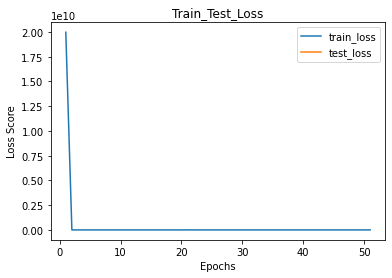

52
Train Epoch: 52 [0/7471 (0%)]	Loss: 5305.409180
Train Epoch: 52 [160/7471 (2%)]	Loss: 5061.684570
Train Epoch: 52 [320/7471 (4%)]	Loss: 5181.576172
Train Epoch: 52 [480/7471 (6%)]	Loss: 4815.827148
Train Epoch: 52 [640/7471 (9%)]	Loss: 5161.784180
Train Epoch: 52 [800/7471 (11%)]	Loss: 5119.715332
Train Epoch: 52 [960/7471 (13%)]	Loss: 4909.854004
Train Epoch: 52 [1120/7471 (15%)]	Loss: 5187.664062
Train Epoch: 52 [1280/7471 (17%)]	Loss: 4817.602051
Train Epoch: 52 [1440/7471 (19%)]	Loss: 5157.943359
Train Epoch: 52 [1600/7471 (21%)]	Loss: 5046.627930
Train Epoch: 52 [1760/7471 (24%)]	Loss: 5195.731445
Train Epoch: 52 [1920/7471 (26%)]	Loss: 5360.528809
Train Epoch: 52 [2080/7471 (28%)]	Loss: 5078.484375
Train Epoch: 52 [2240/7471 (30%)]	Loss: 4920.786621
Train Epoch: 52 [2400/7471 (32%)]	Loss: 5095.843750
Train Epoch: 52 [2560/7471 (34%)]	Loss: 4896.431152
Train Epoch: 52 [2720/7471 (36%)]	Loss: 5454.506348
Train Epoch: 52 [2880/7471 (39%)]	Loss: 5349.958496
Train Epoch: 52 [3040/7

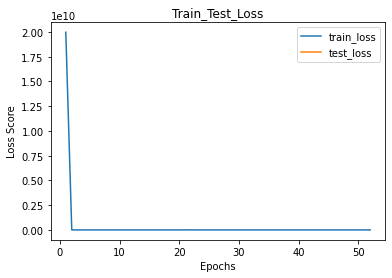

53
Train Epoch: 53 [0/7471 (0%)]	Loss: 5302.549316
Train Epoch: 53 [160/7471 (2%)]	Loss: 5057.390625
Train Epoch: 53 [320/7471 (4%)]	Loss: 4635.833008
Train Epoch: 53 [480/7471 (6%)]	Loss: 4958.194824
Train Epoch: 53 [640/7471 (9%)]	Loss: 5091.563477
Train Epoch: 53 [800/7471 (11%)]	Loss: 5024.295410
Train Epoch: 53 [960/7471 (13%)]	Loss: 5389.009766
Train Epoch: 53 [1120/7471 (15%)]	Loss: 4775.560547
Train Epoch: 53 [1280/7471 (17%)]	Loss: 4915.243164
Train Epoch: 53 [1440/7471 (19%)]	Loss: 4974.934082
Train Epoch: 53 [1600/7471 (21%)]	Loss: 5169.882812
Train Epoch: 53 [1760/7471 (24%)]	Loss: 4972.814941
Train Epoch: 53 [1920/7471 (26%)]	Loss: 5083.845215
Train Epoch: 53 [2080/7471 (28%)]	Loss: 4871.538574
Train Epoch: 53 [2240/7471 (30%)]	Loss: 4789.022949
Train Epoch: 53 [2400/7471 (32%)]	Loss: 4993.994141
Train Epoch: 53 [2560/7471 (34%)]	Loss: 4694.827637
Train Epoch: 53 [2720/7471 (36%)]	Loss: 4949.914551
Train Epoch: 53 [2880/7471 (39%)]	Loss: 4866.349609
Train Epoch: 53 [3040/7

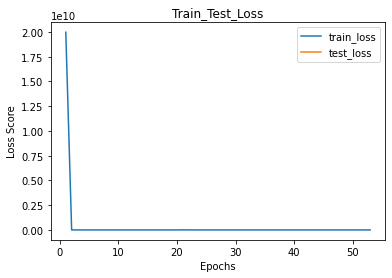

54
Train Epoch: 54 [0/7471 (0%)]	Loss: 5221.382812
Train Epoch: 54 [160/7471 (2%)]	Loss: 5115.701660
Train Epoch: 54 [320/7471 (4%)]	Loss: 4779.297852
Train Epoch: 54 [480/7471 (6%)]	Loss: 4863.877930
Train Epoch: 54 [640/7471 (9%)]	Loss: 4932.270996
Train Epoch: 54 [800/7471 (11%)]	Loss: 5359.003418
Train Epoch: 54 [960/7471 (13%)]	Loss: 4859.633301
Train Epoch: 54 [1120/7471 (15%)]	Loss: 5045.413086
Train Epoch: 54 [1280/7471 (17%)]	Loss: 5034.839844
Train Epoch: 54 [1440/7471 (19%)]	Loss: 5117.151367
Train Epoch: 54 [1600/7471 (21%)]	Loss: 4738.765137
Train Epoch: 54 [1760/7471 (24%)]	Loss: 4866.187012
Train Epoch: 54 [1920/7471 (26%)]	Loss: 4784.397949
Train Epoch: 54 [2080/7471 (28%)]	Loss: 5009.940918
Train Epoch: 54 [2240/7471 (30%)]	Loss: 4498.644531
Train Epoch: 54 [2400/7471 (32%)]	Loss: 4802.292480
Train Epoch: 54 [2560/7471 (34%)]	Loss: 4402.571289
Train Epoch: 54 [2720/7471 (36%)]	Loss: 4508.601074
Train Epoch: 54 [2880/7471 (39%)]	Loss: 4644.085938
Train Epoch: 54 [3040/7

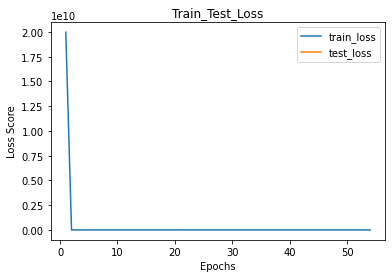

55
Train Epoch: 55 [0/7471 (0%)]	Loss: 4992.966309
Train Epoch: 55 [160/7471 (2%)]	Loss: 4923.535645
Train Epoch: 55 [320/7471 (4%)]	Loss: 4931.281738
Train Epoch: 55 [480/7471 (6%)]	Loss: 4764.821777
Train Epoch: 55 [640/7471 (9%)]	Loss: 4766.601074
Train Epoch: 55 [800/7471 (11%)]	Loss: 5162.457520
Train Epoch: 55 [960/7471 (13%)]	Loss: 4921.656738
Train Epoch: 55 [1120/7471 (15%)]	Loss: 4817.602539
Train Epoch: 55 [1280/7471 (17%)]	Loss: 4806.618652
Train Epoch: 55 [1440/7471 (19%)]	Loss: 4869.922852
Train Epoch: 55 [1600/7471 (21%)]	Loss: 4710.606934
Train Epoch: 55 [1760/7471 (24%)]	Loss: 4448.645508
Train Epoch: 55 [1920/7471 (26%)]	Loss: 4673.033691
Train Epoch: 55 [2080/7471 (28%)]	Loss: 4815.385254
Train Epoch: 55 [2240/7471 (30%)]	Loss: 4904.619629
Train Epoch: 55 [2400/7471 (32%)]	Loss: 5088.313477
Train Epoch: 55 [2560/7471 (34%)]	Loss: 4853.296387
Train Epoch: 55 [2720/7471 (36%)]	Loss: 11966.204102
Train Epoch: 55 [2880/7471 (39%)]	Loss: 4569.898438
Train Epoch: 55 [3040/

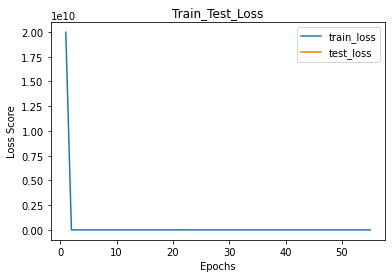

56
Train Epoch: 56 [0/7471 (0%)]	Loss: 4229.758789
Train Epoch: 56 [160/7471 (2%)]	Loss: 4335.270020
Train Epoch: 56 [320/7471 (4%)]	Loss: 4366.491211
Train Epoch: 56 [480/7471 (6%)]	Loss: 4050.559570
Train Epoch: 56 [640/7471 (9%)]	Loss: 4194.290039
Train Epoch: 56 [800/7471 (11%)]	Loss: 3891.515869
Train Epoch: 56 [960/7471 (13%)]	Loss: 4351.815430
Train Epoch: 56 [1120/7471 (15%)]	Loss: 4337.857910
Train Epoch: 56 [1280/7471 (17%)]	Loss: 4078.667725
Train Epoch: 56 [1440/7471 (19%)]	Loss: 4197.456543
Train Epoch: 56 [1600/7471 (21%)]	Loss: 4051.190918
Train Epoch: 56 [1760/7471 (24%)]	Loss: 4173.926270
Train Epoch: 56 [1920/7471 (26%)]	Loss: 3894.354736
Train Epoch: 56 [2080/7471 (28%)]	Loss: 4056.991699
Train Epoch: 56 [2240/7471 (30%)]	Loss: 4008.096191
Train Epoch: 56 [2400/7471 (32%)]	Loss: 3726.249023
Train Epoch: 56 [2560/7471 (34%)]	Loss: 3569.340088
Train Epoch: 56 [2720/7471 (36%)]	Loss: 3850.806396
Train Epoch: 56 [2880/7471 (39%)]	Loss: 4043.832031
Train Epoch: 56 [3040/7

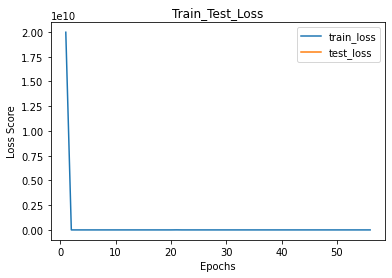

57
Train Epoch: 57 [0/7471 (0%)]	Loss: 4858.519531
Train Epoch: 57 [160/7471 (2%)]	Loss: 4622.474121
Train Epoch: 57 [320/7471 (4%)]	Loss: 4846.998535
Train Epoch: 57 [480/7471 (6%)]	Loss: 4363.066895
Train Epoch: 57 [640/7471 (9%)]	Loss: 4438.465332
Train Epoch: 57 [800/7471 (11%)]	Loss: 4238.350586
Train Epoch: 57 [960/7471 (13%)]	Loss: 4235.255371
Train Epoch: 57 [1120/7471 (15%)]	Loss: 4076.250244
Train Epoch: 57 [1280/7471 (17%)]	Loss: 4395.752930
Train Epoch: 57 [1440/7471 (19%)]	Loss: 4120.028809
Train Epoch: 57 [1600/7471 (21%)]	Loss: 4267.391113
Train Epoch: 57 [1760/7471 (24%)]	Loss: 4184.558594
Train Epoch: 57 [1920/7471 (26%)]	Loss: 4182.005859
Train Epoch: 57 [2080/7471 (28%)]	Loss: 4145.233887
Train Epoch: 57 [2240/7471 (30%)]	Loss: 3954.168945
Train Epoch: 57 [2400/7471 (32%)]	Loss: 3946.261719
Train Epoch: 57 [2560/7471 (34%)]	Loss: 3846.981934
Train Epoch: 57 [2720/7471 (36%)]	Loss: 3922.038330
Train Epoch: 57 [2880/7471 (39%)]	Loss: 3813.436279
Train Epoch: 57 [3040/7

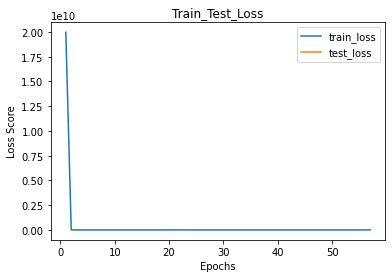

58
Train Epoch: 58 [0/7471 (0%)]	Loss: 3178.975586
Train Epoch: 58 [160/7471 (2%)]	Loss: 3291.474854
Train Epoch: 58 [320/7471 (4%)]	Loss: 3268.883545
Train Epoch: 58 [480/7471 (6%)]	Loss: 3264.098633
Train Epoch: 58 [640/7471 (9%)]	Loss: 3259.534912
Train Epoch: 58 [800/7471 (11%)]	Loss: 2985.731201
Train Epoch: 58 [960/7471 (13%)]	Loss: 3037.032471
Train Epoch: 58 [1120/7471 (15%)]	Loss: 3380.975586
Train Epoch: 58 [1280/7471 (17%)]	Loss: 3114.895752
Train Epoch: 58 [1440/7471 (19%)]	Loss: 3194.242920
Train Epoch: 58 [1600/7471 (21%)]	Loss: 3216.979492
Train Epoch: 58 [1760/7471 (24%)]	Loss: 3164.924805
Train Epoch: 58 [1920/7471 (26%)]	Loss: 3148.793945
Train Epoch: 58 [2080/7471 (28%)]	Loss: 2925.272217
Train Epoch: 58 [2240/7471 (30%)]	Loss: 3242.763184
Train Epoch: 58 [2400/7471 (32%)]	Loss: 37224.957031
Train Epoch: 58 [2560/7471 (34%)]	Loss: 3171.458984
Train Epoch: 58 [2720/7471 (36%)]	Loss: 3341.938477
Train Epoch: 58 [2880/7471 (39%)]	Loss: 3054.304443
Train Epoch: 58 [3040/

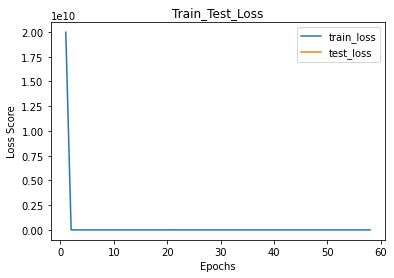

59
Train Epoch: 59 [0/7471 (0%)]	Loss: 2969.883057
Train Epoch: 59 [160/7471 (2%)]	Loss: 7979.568359
Train Epoch: 59 [320/7471 (4%)]	Loss: 3135.209717
Train Epoch: 59 [480/7471 (6%)]	Loss: 3220.251221
Train Epoch: 59 [640/7471 (9%)]	Loss: 2840.214844
Train Epoch: 59 [800/7471 (11%)]	Loss: 3111.085693
Train Epoch: 59 [960/7471 (13%)]	Loss: 3082.546875
Train Epoch: 59 [1120/7471 (15%)]	Loss: 3249.191162
Train Epoch: 59 [1280/7471 (17%)]	Loss: 3010.295654
Train Epoch: 59 [1440/7471 (19%)]	Loss: 3060.815430
Train Epoch: 59 [1600/7471 (21%)]	Loss: 3123.638428
Train Epoch: 59 [1760/7471 (24%)]	Loss: 3223.237305
Train Epoch: 59 [1920/7471 (26%)]	Loss: 3122.885254
Train Epoch: 59 [2080/7471 (28%)]	Loss: 2840.065430
Train Epoch: 59 [2240/7471 (30%)]	Loss: 3104.786133
Train Epoch: 59 [2400/7471 (32%)]	Loss: 2995.065186
Train Epoch: 59 [2560/7471 (34%)]	Loss: 3080.609863
Train Epoch: 59 [2720/7471 (36%)]	Loss: 3187.383545
Train Epoch: 59 [2880/7471 (39%)]	Loss: 3151.072998
Train Epoch: 59 [3040/7

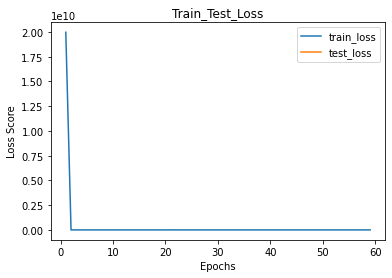

60
Train Epoch: 60 [0/7471 (0%)]	Loss: 2976.130615
Train Epoch: 60 [160/7471 (2%)]	Loss: 2863.160645
Train Epoch: 60 [320/7471 (4%)]	Loss: 3013.183838
Train Epoch: 60 [480/7471 (6%)]	Loss: 2917.476074
Train Epoch: 60 [640/7471 (9%)]	Loss: 2974.204346
Train Epoch: 60 [800/7471 (11%)]	Loss: 2978.438232
Train Epoch: 60 [960/7471 (13%)]	Loss: 2838.005127
Train Epoch: 60 [1120/7471 (15%)]	Loss: 2949.104980
Train Epoch: 60 [1280/7471 (17%)]	Loss: 2812.464355
Train Epoch: 60 [1440/7471 (19%)]	Loss: 2821.939453
Train Epoch: 60 [1600/7471 (21%)]	Loss: 2626.042969
Train Epoch: 60 [1760/7471 (24%)]	Loss: 3120.601318
Train Epoch: 60 [1920/7471 (26%)]	Loss: 3162.295898
Train Epoch: 60 [2080/7471 (28%)]	Loss: 3289.349609
Train Epoch: 60 [2240/7471 (30%)]	Loss: 3066.417725
Train Epoch: 60 [2400/7471 (32%)]	Loss: 3122.864014
Train Epoch: 60 [2560/7471 (34%)]	Loss: 3137.431641
Train Epoch: 60 [2720/7471 (36%)]	Loss: 3200.479004
Train Epoch: 60 [2880/7471 (39%)]	Loss: 3212.991943
Train Epoch: 60 [3040/7

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


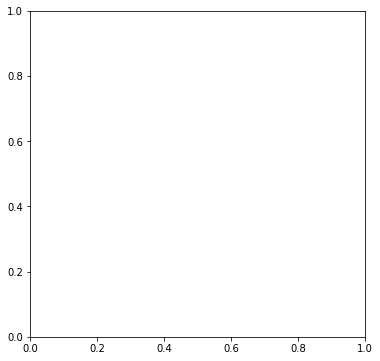

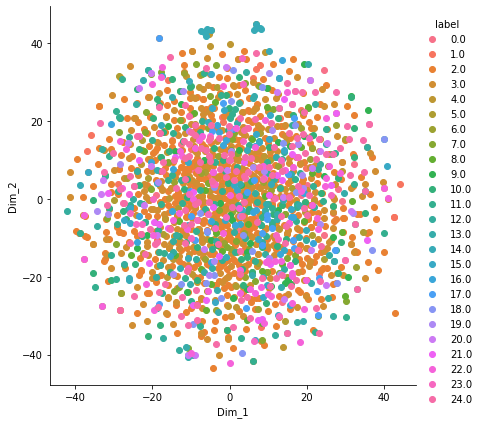

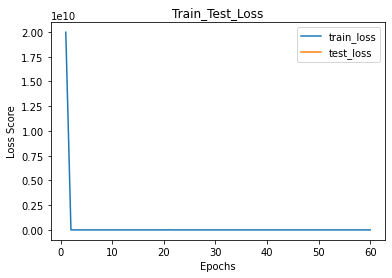

61
Train Epoch: 61 [0/7471 (0%)]	Loss: 2865.936523
Train Epoch: 61 [160/7471 (2%)]	Loss: 2746.354736
Train Epoch: 61 [320/7471 (4%)]	Loss: 2791.172363
Train Epoch: 61 [480/7471 (6%)]	Loss: 3002.049805
Train Epoch: 61 [640/7471 (9%)]	Loss: 3228.747070
Train Epoch: 61 [800/7471 (11%)]	Loss: 3476.824707
Train Epoch: 61 [960/7471 (13%)]	Loss: 3107.808350
Train Epoch: 61 [1120/7471 (15%)]	Loss: 2843.598389
Train Epoch: 61 [1280/7471 (17%)]	Loss: 3123.264648
Train Epoch: 61 [1440/7471 (19%)]	Loss: 3655.906494
Train Epoch: 61 [1600/7471 (21%)]	Loss: 3687.472412
Train Epoch: 61 [1760/7471 (24%)]	Loss: 4358.182617
Train Epoch: 61 [1920/7471 (26%)]	Loss: 4171.559082
Train Epoch: 61 [2080/7471 (28%)]	Loss: 14251.286133
Train Epoch: 61 [2240/7471 (30%)]	Loss: 3918.042969
Train Epoch: 61 [2400/7471 (32%)]	Loss: 4308.571289
Train Epoch: 61 [2560/7471 (34%)]	Loss: 4371.670410
Train Epoch: 61 [2720/7471 (36%)]	Loss: 4318.405273
Train Epoch: 61 [2880/7471 (39%)]	Loss: 4266.940430
Train Epoch: 61 [3040/

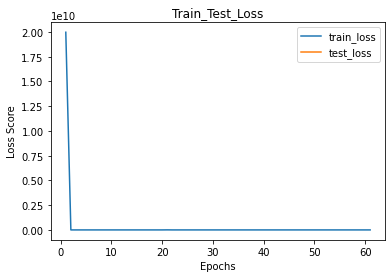

62
Train Epoch: 62 [0/7471 (0%)]	Loss: 4317.952148
Train Epoch: 62 [160/7471 (2%)]	Loss: 4377.341309
Train Epoch: 62 [320/7471 (4%)]	Loss: 4581.473145
Train Epoch: 62 [480/7471 (6%)]	Loss: 4119.696289
Train Epoch: 62 [640/7471 (9%)]	Loss: 4455.983398
Train Epoch: 62 [800/7471 (11%)]	Loss: 4370.321289
Train Epoch: 62 [960/7471 (13%)]	Loss: 4766.361816
Train Epoch: 62 [1120/7471 (15%)]	Loss: 4993.220703
Train Epoch: 62 [1280/7471 (17%)]	Loss: 4552.679688
Train Epoch: 62 [1440/7471 (19%)]	Loss: 5194.027832
Train Epoch: 62 [1600/7471 (21%)]	Loss: 5490.414551
Train Epoch: 62 [1760/7471 (24%)]	Loss: 5498.491211
Train Epoch: 62 [1920/7471 (26%)]	Loss: 5300.552734


RuntimeError: ignored

In [ ]:
epochs = 200

for epoch in range(1, epochs + 1):
        print(epoch)
        train(epoch)
        test(epoch)

        plt.plot(Epoch_Loss['train_epoch'],Epoch_Loss['train_loss'], label="train_loss")
        plt.plot(Epoch_Loss['test_epoch'],Epoch_Loss['test_loss'], label="test_loss")
        plt.xlabel('Epochs')
        plt.ylabel('Loss Score')
        plt.title('Train_Test_Loss')
        plt.legend()
        plt.savefig('./plot_02/'+str(epoch)+'_epoch.png', dpi=300)
        plt.show()

        with torch.no_grad():
            sample = torch.randn(64, 100).to(device)
            sample = model.decode(sample).cpu()
            save_image(sample.view(64, 1, 224, 224),
                       './results_02/sample_' + str(epoch) + '.png')